In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import itertools
import random
import pickle


In [2]:
df = pd.read_csv('team_data.csv')



In [3]:
print(list(df.columns))

['condition', 'team_id', 'mapA_first', 'Map_order', 'Anxiety_average', 'team_score_SaturnA', 'walk_mean', 'team_effort_SaturnA', 'team_effort_SaturnB', 'team_effort_average', 'process_skill_use_agg_SatA', 'process_effort_agg_SatA', 'score_team_agg_SatB', 'process_skill_use_agg_SatB', 'process_effort_agg_SatB', 'skill_use_average', 'effort_average', 'skilluse1_SaturnA', 'skilluse2_SaturnA', 'skilluse3_SaturnA', 'skilluse4_SaturnA', 'skilluse5_SaturnA', 'skilluse6_SaturnA', 'skilluse7_SaturnA', 'skilluse8_SaturnA', 'skilluse9_SaturnA', 'skilluse10_SaturnA', 'skilluse11_SaturnA', 'skilluse12_SaturnA', 'skilluse13_SaturnA', 'skilluse14_SaturnA', 'skilluse15_SaturnA', 'skilluse1_SaturnB', 'skilluse2_SaturnB', 'skilluse3_SaturnB', 'skilluse4_SaturnB', 'skilluse5_SaturnB', 'skilluse6_SaturnB', 'skilluse7_SaturnB', 'skilluse8_SaturnB', 'skilluse9_SaturnB', 'skilluse10_SaturnB', 'skilluse11_SaturnB', 'skilluse12_SaturnB', 'skilluse13_SaturnB', 'skilluse14_SaturnB', 'skilluse15_SaturnB', 'effort

In [4]:
# from dependencies import *
# from understanding_human_strategy.code.dependencies import *


class HiddenMarkovModel:
    '''
    Class implementation of Hidden Markov Models.
    '''

    def __init__(self, A, O):
        '''
        Initializes an HMM. Assumes the following:
            - States and observations are integers starting from 0.
            - There is a start state (see notes on A_start below). There
              is no integer associated with the start state, only
              probabilities in the vector A_start.
            - There is no end state.
        Arguments:
            A:          Transition matrix with dimensions L x L.
                        The (i, j)^th element is the probability of
                        transitioning from state i to state j. Note that
                        this does not include the starting probabilities.
            O:          Observation matrix with dimensions L x D.
                        The (i, j)^th element is the probability of
                        emitting observation j given state i.
        Parameters:
            L:          Number of states.

            D:          Number of observations.

            A:          The transition matrix.

            O:          The observation matrix.

            A_start:    Starting transition probabilities. The i^th element
                        is the probability of transitioning from the start
                        state to state i. For simplicity, we assume that
                        this distribution is uniform.
        '''

        self.L = len(A)
        self.D = len(O[0])
        self.A = A
        self.O = O
        self.A_start = [1. / self.L for _ in range(self.L)]

    def viterbi(self, x):
        '''
        Uses the Viterbi algorithm to find the max probability state
        sequence corresponding to a given input sequence.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
        Returns:
            max_seq:    State sequence corresponding to x with the highest
                        probability.
        '''

        M = len(x)  # Length of sequence.

        # The (i, j)^th elements of probs and seqs are the max probability
        # of the prefix of length i ending in state j and the prefix
        # that gives this probability, respectively.
        #
        # For instance, probs[1][0] is the probability of the prefix of
        # length 1 ending in state 0.
        probs = [[0. for _ in range(self.L)] for _ in range(M + 1)]
        seqs = [['' for _ in range(self.L)] for _ in range(M + 1)]

        num_states = self.L
        num_obs = self.D

        # y = OBSERVATIONS (D) BY x = STATES (L)

        # Set start state transitions to be A_start.
        probs[0] = self.A_start
        for t in range(1, M + 1):
            for o_curr in range(num_states):
                # For first state after the state state, only multiply the previous
                # probability by emission probability.
                if t == 1:
                    checkVal = np.array(probs[t - 1]) * self.O[o_curr][x[t - 1]]
                    # Set the maximum probability to be the value at the next probs[i, j] and
                    # add the max probability sequence to seqs.
                    probs[t][o_curr] = max(checkVal)
                    add = []
                    for j in range(num_states):
                        add.append(str(j))
                    seqs[t] = add

                else:
                    # For other states, multiply the previous
                    # max probability by the emission and transition probability.
                    checkVal = np.multiply(probs[t - 1], np.transpose(self.A)[o_curr]) * self.O[o_curr][x[t - 1]]
                    max_index = np.argmax(checkVal)
                    # Set the maximum probability to be the value at the next probs[i, j] and
                    # add the max probability sequence to seqs.
                    probs[t][o_curr] = max(checkVal)
                    add = seqs[t - 1][max_index] + str(o_curr)
                    seqs[t][o_curr] = add

        # Get the maximum probability and max probability sequence.
        # print(f'probs[M]= {probs[M]}, seqs[M] = {seqs[M]}')
        max_prob_i = np.argmax(probs[M])
        max_seq = seqs[M][max_prob_i]

        return max_seq

    def viterbi_all_probs(self, x):
        '''
        Uses the Viterbi algorithm to find the max probability state
        sequence corresponding to a given input sequence.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
        Returns:
            max_seq:    State sequence corresponding to x with the highest
                        probability.
        '''

        M = len(x)  # Length of sequence.

        # The (i, j)^th elements of probs and seqs are the max probability
        # of the prefix of length i ending in state j and the prefix
        # that gives this probability, respectively.
        #
        # For instance, probs[1][0] is the probability of the prefix of
        # length 1 ending in state 0.
        probs = [[0. for _ in range(self.L)] for _ in range(M + 1)]
        seqs = [['' for _ in range(self.L)] for _ in range(M + 1)]

        num_states = self.L
        num_obs = self.D

        # y = OBSERVATIONS (D) BY x = STATES (L)


        # Fill hidden sequences dictionary
        # all_sequences_and_probs = {}
        # probs[0] = self.A_start
        # for t in range(1, M + 1):
        #     for o_curr in range(num_states):
        #         if t == 1:
        #             checkVal = np.array(probs[t - 1]) * self.O[o_curr][x[t - 1]]
        #             # Set the maximum probability to be the value at the next probs[i, j] and
        #             # add the max probability sequence to seqs.
        #             probs[t][o_curr] = max(checkVal)
        #             add = []
        #             for j in range(num_states):
        #                 add.append(str(j))
        #             seqs[t] = add
        #
        #             all_sequences_and_probs["".join(add)] = max(checkVal)
        #
        #
        #
        #         else:
        #             # For other states, multiply the previous
        #             # max probability by the emission and transition probability.
        #             checkVal = np.multiply(probs[t - 1], np.transpose(self.A)[o_curr]) * self.O[o_curr][x[t - 1]]
        #             max_index = np.argmax(checkVal)
        #             # Set the maximum probability to be the value at the next probs[i, j] and
        #             # add the max probability sequence to seqs.
        #             probs[t][o_curr] = max(checkVal)
        #             add = seqs[t - 1][max_index] + str(o_curr)
        #             seqs[t][o_curr] = add
        #
        #             # for index_i in range(len(checkVal)):
        #             #     string_add = seqs[t - 1][index_i] + str(o_curr)
        #             #     all_sequences_and_probs["".join(string_add)] = checkVal[index_i]
        #

        # Set start state transitions to be A_start.
        all_sequences_and_probs = {}
        probs[0] = self.A_start
        for t in range(1, M + 1):
            for o_curr in range(num_states):


                # For first state after the state state, only multiply the previous
                # probability by emission probability.
                if t == 1:
                    checkVal = np.array(probs[t - 1]) * self.O[o_curr][x[t - 1]]
                    # Set the maximum probability to be the value at the next probs[i, j] and
                    # add the max probability sequence to seqs.
                    probs[t][o_curr] = max(checkVal)
                    add = []
                    for j in range(num_states):
                        add.append(str(j))
                    seqs[t] = add

                    all_sequences_and_probs["".join(add)] = max(checkVal)



                else:
                    # For other states, multiply the previous
                    # max probability by the emission and transition probability.
                    checkVal = np.multiply(probs[t - 1], np.transpose(self.A)[o_curr]) * self.O[o_curr][x[t - 1]]
                    max_index = np.argmax(checkVal)
                    # Set the maximum probability to be the value at the next probs[i, j] and
                    # add the max probability sequence to seqs.
                    probs[t][o_curr] = max(checkVal)
                    add = seqs[t - 1][max_index] + str(o_curr)
                    seqs[t][o_curr] = add

                    for index_i in range(len(checkVal)):
                        string_add = seqs[t - 1][index_i] + str(o_curr)
                        all_sequences_and_probs["".join(string_add)] = checkVal[index_i]

        # Get the maximum probability and max probability sequence.
        # print(f'probs= {probs}, seqs = {seqs}\n\n')
        # print('all_sequences_and_probs', all_sequences_and_probs)
        max_prob_i = np.argmax(probs[M])
        max_seq = seqs[M][max_prob_i]

        return max_seq, all_sequences_and_probs



    def forward(self, x, normalize=False):
        '''
        Uses the forward algorithm to calculate the alpha probability
        vectors corresponding to a given input sequence.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
            normalize:  Whether to normalize each set of alpha_j(i) vectors
                        at each i. This is useful to avoid underflow in
                        unsupervised learning.
        Returns:
            alphas:     Vector of alphas.
                        The (i, j)^th element of alphas is alpha_j(i),
                        i.e. the probability of observing prefix x^1:i
                        and state y^i = j.
                        e.g. alphas[1][0] corresponds to the probability
                        of observing x^1:1, i.e. the first observation,
                        given that y^1 = 0, i.e. the first state is 0.
        '''

        M = len(x)  # Length of sequence.
        alphas = [[0. for _ in range(self.L)] for _ in range(M + 1)]

        num_states = self.L
        num_obs = self.D
        alphas[0] = self.A_start

        for t in range(1, M + 1):
            for o_curr in range(num_states):
                # For each state, multiply the previous
                # max probability by the emission and transition probability, set alphas
                # to be the sum of probabilities.
                if t == 1:
                    checkVal = np.array(alphas[t - 1]) * self.O[o_curr][x[t - 1]] * self.A_start[0]
                    alphas[t][o_curr] = sum(checkVal)

                else:
                    checkVal = np.multiply(alphas[t - 1], np.transpose(self.A)[o_curr]) * self.O[o_curr][x[t - 1]]
                    max_index = np.argmax(checkVal)
                    alphas[t][o_curr] = sum(checkVal)

        return alphas

    def backward(self, x, normalize=False):
        '''
        Uses the backward algorithm to calculate the beta probability
        vectors corresponding to a given input sequence.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
            normalize:  Whether to normalize each set of alpha_j(i) vectors
                        at each i. This is useful to avoid underflow in
                        unsupervised learning.
        Returns:
            betas:      Vector of betas.
                        The (i, j)^th element of betas is beta_j(i), i.e.
                        the probability of observing prefix x^(i+1):M and
                        state y^i = j.
                        e.g. betas[M][0] corresponds to the probability
                        of observing x^M+1:M, i.e. no observations,
                        given that y^M = 0, i.e. the last state is 0.
        '''

        M = len(x)  # Length of sequence.
        betas = [[0. for _ in range(self.L)] for _ in range(M + 1)]

        num_states = self.L
        num_obs = self.D

        # Initialize end probabilities to be 1.
        for i in range(num_states):
            betas[M][i] = 1

        t = M - 1

        while t >= 0:
            for o_curr in range(num_states):
                # Take the sum of the previous probability times the
                # transition and emission probabilities.
                checkVal = 0
                for i in range(len(self.A)):
                    checkVal += (betas[t + 1][i] * self.A[o_curr][i]) * self.O[i][x[t]]
                betas[t][o_curr] = checkVal
            t -= 1

        return betas

    def supervised_learning(self, X, Y):
        '''
        Trains the HMM using the Maximum Likelihood closed form solutions
        for the transition and observation matrices on a labeled
        datset (X, Y). Note that this method does not return anything, but
        instead updates the attributes of the HMM object.
        Arguments:
            X:          A dataset consisting of input sequences in the form
                        of lists of variable length, consisting of integers
                        ranging from 0 to D - 1. In other words, a list of
                        lists.
            Y:          A dataset consisting of state sequences in the form
                        of lists of variable length, consisting of integers
                        ranging from 0 to L - 1. In other words, a list of
                        lists.
                        Note that the elements in X line up with those in Y.
        '''

        # Calculate each element of A using the M-step formulas.
        N = len(X)

        for a in range(len(self.A)):
            for b in range(len(self.A[0])):
                sum2_num = 0
                sum2_denom = 0
                for i in range(N):
                    sum1_num = 0
                    sum1_denom = 0
                    # Compute each marginal probability.
                    for j in range(1, len(Y[i])):
                        if Y[i][j - 1] == a:
                            sum1_denom += 1
                        if Y[i][j - 1] == a and Y[i][j] == b:
                            sum1_num += 1
                    sum2_num += sum1_num
                    sum2_denom += sum1_denom

                if sum2_denom == 0:
                    self.A[a][b] = 0
                else:
                    self.A[a][b] = sum2_num / sum2_denom

        # Calculate each element of O using the M-step formulas.
        for w in range(len(self.O[0])):
            for a in range(len(self.O)):
                sum2_numerator = 0
                sum2_denom = 0
                for i in range(0, N):
                    sum1_numerator = 0
                    sum1_denom = 0
                    # Compute each marginal probability.
                    for j in range(len(Y[i])):
                        if Y[i][j] == a:
                            sum1_denom += 1
                            if X[i][j] == w:
                                sum1_numerator += 1
                    sum2_numerator += sum1_numerator
                    sum2_denom += sum1_denom
                if sum2_denom == 0:
                    self.O[a][w] = 0
                else:
                    self.O[a][w] = sum2_numerator / sum2_denom

    # Compute the marginal probabilities for the numerator of O,
    # and denominators of O and A.
    def P_with_1Y(self, j, a, b, alphas, betas):
        numerator = alphas[j][a] * betas[j][a]
        summation = 0
        for p in range(self.L):
            summation += alphas[j][p] * betas[j][p]
        if summation == 0:
            return 0
        return numerator / summation

    # Compute the marginal probability for the numerator of A.
    def P_with_2Y(self, x, j, a, b, alphas, betas):

        intermediate = 0
        for x_idx in range(len(x)):
            intermediate += self.O[b][x[x_idx]]

        numerator = alphas[j][a] * self.O[b][x[j]] * self.A[a][b] * betas[j + 1][b]

        summation = 0
        for a_idx in range(self.L):
            for b_idx in range(self.L):
                summation += alphas[j][a_idx] * self.O[b_idx][x[j]] * self.A[a_idx][b_idx] * betas[j + 1][b_idx]

        if summation == 0:
            return 0

        return numerator / summation

    def unsupervised_learning(self, X, N_iters=1000):
        '''
        Trains the HMM using the Baum-Welch algorithm on an unlabeled
        datset X. Note that this method does not return anything, but
        instead updates the attributes of the HMM object.
        Arguments:
            X:          A dataset consisting of input sequences in the form
                        of lists of length M, consisting of integers ranging
                        from 0 to D - 1. In other words, a list of lists.
            N_iters:    The number of iterations to train on.
        '''
        # N = len(X)
        # print("shape of X", len(X), len(X[0]))

        for n_iter in range(N_iters):
            # print('iteration', n_iter)

            # Make temporary arrays to hold A and O values.
            A_num = np.zeros((len(self.A), len(self.A[0])))
            A_den = np.zeros((len(self.A), len(self.A[0])))
            O_num = np.zeros((len(self.O), len(self.O[0])))
            O_den = np.zeros((len(self.O), len(self.O[0])))

            for x in X:
                # Compute alphas and betas.
                alphas = self.forward(x)
                betas = self.backward(x)

                M = len(x)

                # Compute A denominator values first.
                for j in range(1, M + 1):
                    for a in range(len(self.A)):
                        for b in range(len(self.A[0])):
                            A_den[a][b] += self.P_with_1Y(j, a, b, alphas, betas)

                # Compute O numerator and denominator values next.
                for j in range(1, M):
                    for w in range(len(self.O[0])):
                        for a in range(len(self.O)):
                            O_den[a][w] += self.P_with_1Y(j, a, b, alphas, betas)
                            if x[j - 1] == w:
                                O_num[a][w] += self.P_with_1Y(j, a, b, alphas, betas)

                # Compute A numerator values next.
                for j in range(1, M - 1):
                    for a in range(len(self.A)):
                        for b in range(len(self.A[0])):
                            A_num[a][b] += self.P_with_2Y(x, j, a, b, alphas, betas)

            # Set new A and O matrix values by dividing numerator over denominator values.
            for a in range(len(self.A)):
                for b in range(len(self.A[0])):
                    if A_den[a][b] == 0:
                        self.A[a][b] = 0
                    else:
                        self.A[a][b] = A_num[a][b] / A_den[a][b]

            for w in range(len(self.O[0])):
                for a in range(len(self.O)):
                    if O_den[a][w] == 0:
                        self.O[a][w] = 0
                    else:
                        self.O[a][w] = O_num[a][w] / O_den[a][w]

    def generate_emission(self, M):
        '''
        Generates an emission of length M, assuming that the starting state
        is chosen uniformly at random.
        Arguments:
            M:          Length of the emission to generate.
        Returns:
            emission:   The randomly generated emission as a list.
            states:     The randomly generated states as a list.
        '''

        emission = []
        states = []
        # Randomly select a state state.
        current_state = np.random.randint(len(self.A))

        # For an emission of length M
        for m in range(M):
            current_A = self.A[current_state]
            rand_prob_A = np.random.uniform(0, 1)

            next_state = 0
            # Find the next state by randomly picking a
            # probability between 0 and 1. If this
            # probability falls in the range for a particular state,
            # assign that state to be the next state.
            for a1 in range(len(current_A)):
                sum_A = 0
                for a2 in range(a1):
                    sum_A += current_A[a2]
                if sum_A > rand_prob_A:
                    break
                next_state = a1
            current_state = next_state

            # Find the next observation emission by randomly picking a
            # probability between 0 and 1. If this
            # probability falls in the range for a particular emission for
            # the current state,
            # assign that emission to be the emission.
            next_emission = 0
            current_O = self.O[current_state]
            rand_prob_O = np.random.uniform(0, 1)
            for o1 in range(len(current_O)):
                sum_O = 0
                for o2 in range(o1):
                    sum_O += current_O[o2]
                if sum_O > rand_prob_O:
                    break
                next_emission = o1

            # Add the new state and new emission to the lists.

            states.append(current_state)
            emission.append(next_emission)

        return emission, states

    def probability_alphas(self, x):
        '''
        Finds the maximum probability of a given input sequence using
        the forward algorithm.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
        Returns:
            prob:       Total probability that x can occur.
        '''

        # Calculate alpha vectors.
        alphas = self.forward(x)

        # alpha_j(M) gives the probability that the state sequence ends
        # in j. Summing this value over all possible states j gives the
        # total probability of x paired with any state sequence, i.e.
        # the probability of x.
        prob = sum(alphas[-1])
        return prob

    def probability_betas(self, x):
        '''
        Finds the maximum probability of a given input sequence using
        the backward algorithm.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
        Returns:
            prob:       Total probability that x can occur.
        '''

        betas = self.backward(x)

        # beta_j(1) gives the probability that the state sequence starts
        # with j. Summing this, multiplied by the starting transition
        # probability and the observation probability, over all states
        # gives the total probability of x paired with any state
        # sequence, i.e. the probability of x.
        prob = sum([betas[1][j] * self.A_start[j] * self.O[j][x[0]] \
                    for j in range(self.L)])

        return prob


def supervised_HMM(X, Y):
    '''
    Helper function to train a supervised HMM. The function determines the
    number of unique states and observations in the given data, initializes
    the transition and observation matrices, creates the HMM, and then runs
    the training function for supervised learning.
    Arguments:
        X:          A dataset consisting of input sequences in the form
                    of lists of variable length, consisting of integers
                    ranging from 0 to D - 1. In other words, a list of lists.
        Y:          A dataset consisting of state sequences in the form
                    of lists of variable length, consisting of integers
                    ranging from 0 to L - 1. In other words, a list of lists.
                    Note that the elements in X line up with those in Y.
    '''
    # Make a set of observations.
    observations = set()
    for x in X:
        observations |= set(x)

    # Make a set of states.
    states = set()
    for y in Y:
        states |= set(y)

    # Compute L and D.
    L = len(states)
    D = len(observations)

    # Randomly initialize and normalize matrix A.
    A = [[random.random() for i in range(L)] for j in range(L)]

    for i in range(len(A)):
        norm = sum(A[i])
        for j in range(len(A[i])):
            A[i][j] /= norm

    # Randomly initialize and normalize matrix O.
    O = [[random.random() for i in range(D)] for j in range(L)]

    for i in range(len(O)):
        norm = sum(O[i])
        for j in range(len(O[i])):
            O[i][j] /= norm

    # Train an HMM with labeled data.
    HMM = HiddenMarkovModel(A, O)
    HMM.supervised_learning(X, Y)

    return HMM


def unsupervised_HMM(X, n_states, N_iters):
    '''
    Helper function to train an unsupervised HMM. The function determines the
    number of unique observations in the given data, initializes
    the transition and observation matrices, creates the HMM, and then runs
    the training function for unsupervised learing.
    Arguments:
        X:          A dataset consisting of input sequences in the form
                    of lists of variable length, consisting of integers
                    ranging from 0 to D - 1. In other words, a list of lists.
        n_states:   Number of hidden states to use in training.

        N_iters:    The number of iterations to train on.
    '''

    # Make a set of observations.
    observations = set()
    for x in X:
        observations |= set(x)

    # Compute L and D.
    L = n_states
    D = len(observations)

    # Randomly initialize and normalize matrix A.
    A = [[random.random() for i in range(L)] for j in range(L)]

    for i in range(len(A)):
        norm = sum(A[i])
        for j in range(len(A[i])):
            A[i][j] /= norm

    # Randomly initialize and normalize matrix O.
    O = [[random.random() for i in range(D)] for j in range(L)]

    for i in range(len(O)):
        norm = sum(O[i])
        for j in range(len(O[i])):
            O[i][j] /= norm

    # random.seed(420)
    # A = [[random.random() for i in range(L)] for j in range(L)]

    # # Randomly initialize and normalize matrix O.
    # random.seed(69)
    # O = [[random.random() for i in range(D)] for j in range(L)]

    # Train an HMM with unlabeled data.
    HMM = HiddenMarkovModel(A, O)
    HMM.unsupervised_learning(X, N_iters)

    return HMM


def visualize_sparsities(hmm, O_max_cols=50, O_vmax=0.1):
    plt.close('all')
    plt.set_cmap('viridis')

    # Visualize sparsity of A.
    plt.imshow(hmm.A, vmax=1.0)
    plt.colorbar()
    plt.title('Sparsity of A matrix')
    plt.show()

    # Visualize parsity of O.
    plt.imshow(np.array(hmm.O)[:, :O_max_cols], vmax=O_vmax, aspect='auto')
    plt.colorbar()
    plt.title('Sparsity of O matrix')
    plt.show()









In [5]:
map_letter = 'A'

global_mean_walking = np.mean(df['walk_mean'])
global_mean_anxiety = np.mean(df['Anxiety_average'])

print("global_mean_walking", global_mean_walking)
print("global_mean_anxiety", global_mean_anxiety)



teams_list = list(df['team_id'].unique())
print("teams_list", teams_list)


global_mean_walking 0.4711475409836066
global_mean_anxiety 1.65983606557377
teams_list ['TM000104', 'TM000153', 'TM000101', 'TM000161', 'TM000111', 'TM000138', 'TM000122', 'TM000113', 'TM000163', 'TM000119', 'TM000156', 'TM000114', 'TM000167', 'TM000137', 'TM000162', 'TM000151', 'TM000146', 'TM000121', 'TM000147', 'TM000130', 'TM000128', 'TM000123', 'TM000140', 'TM000164', 'TM000150', 'TM000165', 'TM000120', 'TM000154', 'TM000158', 'TM000155', 'TM000109', 'TM000131', 'TM000115', 'TM000118', 'TM000103', 'TM000132', 'TM000116', 'TM000141', 'TM000108', 'TM000157', 'TM000133', 'TM000136', 'TM000149', 'TM000143', 'TM000107', 'TM000124', 'TM000145', 'TM000129', 'TM000160', 'TM000142', 'TM000166', 'TM000127', 'TM000139', 'TM000110', 'TM000105', 'TM000159', 'TM000152', 'TM000148', 'TM000102', 'TM000125', 'TM000126']


In [6]:
average_minute_skill = {}
average_minute_workload = {}
average_minute_effort = {}

for map_letter in ['A', 'B']:
    average_minute_skill[map_letter] = {}
    average_minute_workload[map_letter] = {}
    average_minute_effort[map_letter] = {}
    for t in range(1, 16):
        average_minute_skill[map_letter][t] = []
        average_minute_workload[map_letter][t] = []
        average_minute_effort[map_letter][t] = []
        

for map_letter in ['A', 'B']:
    for t in range(1, 16):
        keyname = f'skilluse{t}_Saturn{map_letter}'
        average_minute_skill[map_letter][t].extend(list(df[keyname].to_numpy()))
        keyname = f'workload_burnt{t}_Saturn{map_letter}'
        average_minute_workload[map_letter][t].extend(list(df[keyname].to_numpy()))
        keyname = f'effort{t}_Saturn{map_letter}'
        average_minute_effort[map_letter][t].extend(list(df[keyname].to_numpy()))
    

for map_letter in ['A', 'B']:
    for t in range(1, 16):
        average_minute_skill[map_letter][t] = np.mean(average_minute_skill[map_letter][t])



In [7]:
# Classify teams into 4 groups


# Group 1 = High Walking, High Anxiety
# Group 2 = Low Walking, High Anxiety
# Group 3 = High Walking, Low Anxiety
# Group 4 = Low Walking, Low Anxiety

teams_list = df['team_id'].to_numpy()


team_walking = df['walk_mean'].to_numpy()
team_anxiety = df['Anxiety_average'].to_numpy()

team_id_to_group = {}
group_to_teams = {1:[], 2:[], 3:[], 4:[]}

for i in range(len(teams_list)):
    team_id = teams_list[i]
    walk = team_walking[i]
    anx = team_anxiety[i]
    if walk <= global_mean_walking:
        if anx >= global_mean_anxiety:
            group = 1
        else:
            group = 3
    else:
        if anx >= global_mean_anxiety:
            group = 2
        else:
            group = 4

    team_id_to_group[team_id] = group
    group_to_teams[group].append(team_id)
    


In [8]:


def visualize_sparsities(A, O):
    plt.close('all')
    plt.set_cmap('Reds')

    # Visualize sparsity of A.
    plt.imshow(A, vmax=1.0)
    plt.colorbar()
    plt.title('Sparsity of A matrix')
    plt.show()

    # Visualize parsity of O.
    plt.imshow(np.array(O)[:, :], aspect='auto')
    plt.colorbar()
    plt.title('Sparsity of O matrix')
    plt.show()





# Plot with Numbers in Matrix

In [9]:
# Group 1 = High Walking, High Anxiety
# Group 2 = Low Walking, High Anxiety
# Group 3 = High Walking, Low Anxiety
# Group 4 = Low Walking, Low Anxiety

group_no_to_title = {
    1: 'High Walking, High Anxiety',
    2: 'Low Walking, High Anxiety',
    3: 'High Walking, Low Anxiety',
    4: 'Low Walking, Low Anxiety',
}



# Get Confidence Values

## Get dataset

In [11]:
group_no_to_team_data = {}
for group_no in [1,2,3,4]:
    group_no_to_team_data[group_no] = {}
    teams_in_group = group_to_teams[group_no]

    # Get Minute by Minute Averages for Group
    average_minute_skill = {}
    average_minute_workload = {}
    average_minute_effort = {}

    for map_letter in ['A', 'B']:
        average_minute_skill[map_letter] = {}
        average_minute_workload[map_letter] = {}
        average_minute_effort[map_letter] = {}
        for t in range(1, 16):
            average_minute_skill[map_letter][t] = []
            average_minute_workload[map_letter][t] = []
            average_minute_effort[map_letter][t] = []


    for map_letter in ['A', 'B']:
        for t in range(1, 16):
            team_df = df[df['team_id'].isin(teams_in_group)]

            keyname = f'skilluse{t}_Saturn{map_letter}'
            average_minute_skill[map_letter][t].extend(list(team_df[keyname].to_numpy()))
            keyname = f'workload_burnt{t}_Saturn{map_letter}'
            average_minute_workload[map_letter][t].extend(list(team_df[keyname].to_numpy()))
            keyname = f'effort{t}_Saturn{map_letter}'
            average_minute_effort[map_letter][t].extend(list(team_df[keyname].to_numpy()))


    for map_letter in ['A', 'B']:
        for t in range(1, 16):
            average_minute_skill[map_letter][t] = np.mean(average_minute_skill[map_letter][t])
            average_minute_workload[map_letter][t] = np.mean(average_minute_workload[map_letter][t])
            average_minute_effort[map_letter][t] = np.mean(average_minute_effort[map_letter][t])

    # Get team minute binary values and unique states
    team_to_state = {}
    unique_states = []
    for team_id in teams_in_group:
        team_to_state[team_id] = {}
        for map_letter in ['A', 'B']:
            state_vector = []
            past_state = (0,0,0)
            for t in range(1, 16):
                keyname = f'skilluse{t}_Saturn{map_letter}'
                skill = df[df['team_id']==team_id][keyname].to_numpy()[0]
                if skill < average_minute_skill[map_letter][t]:
                    skill = 0
                else:
                    skill = 1

                keyname = f'workload_burnt{t}_Saturn{map_letter}'
                workload = df[df['team_id']==team_id][keyname].to_numpy()[0]
                if workload < average_minute_workload[map_letter][t]:
                    workload = 0
                else:
                    workload = 1

                keyname = f'effort{t}_Saturn{map_letter}'
                effort = df[df['team_id']==team_id][keyname].to_numpy()[0]
                if effort < average_minute_effort[map_letter][t]:
                    effort = 0
                else:
                    effort = 1

                state = (skill, workload, effort)
                joint_state = (skill, workload, effort, past_state[0], past_state[1], past_state[2])
                
                
                if t == 1:
                    past_state = state
                else:
                    state_vector.append(joint_state)
                    unique_states.append(joint_state)
                    past_state = state

            team_to_state[team_id][map_letter] = state_vector


    unique_states_list = list(set(unique_states))

    state_id_to_state = dict(enumerate(unique_states_list))
    state_to_state_id = {v: k for k, v in state_id_to_state.items()}

    team_to_state_id_sequence = {}
    team_id_map_to_state_id_sequence = {}
    for team_no in team_to_state:
        team_to_state_id_sequence[team_no] = {}
        for map_letter in ['A', 'B']: 
            state_seq = [state_to_state_id[x] for x in team_to_state[team_no][map_letter]]
            team_to_state_id_sequence[team_no][map_letter] = state_seq
            team_id_map_to_state_id_sequence[(team_no, map_letter)] = team_to_state[team_no][map_letter]

            
    group_no_to_team_data[group_no]['teams_state_id'] = team_to_state_id_sequence
    group_no_to_team_data[group_no]['teams_state'] = team_to_state
    group_no_to_team_data[group_no]['state_id_to_state'] = state_id_to_state
    group_no_to_team_data[group_no]['state_to_state_id'] = state_to_state_id
    
            

## Compute Loss

In [15]:
with open('group_hmms4.pickle', 'rb') as handle:
    group_no_to_hmm = pickle.load(handle)

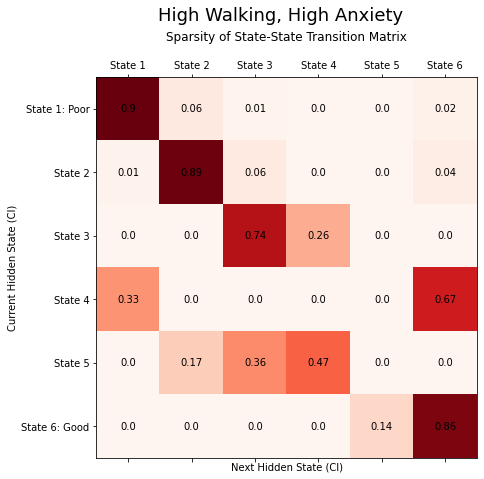

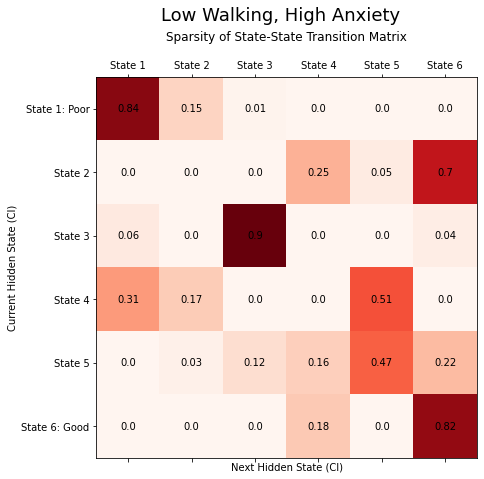

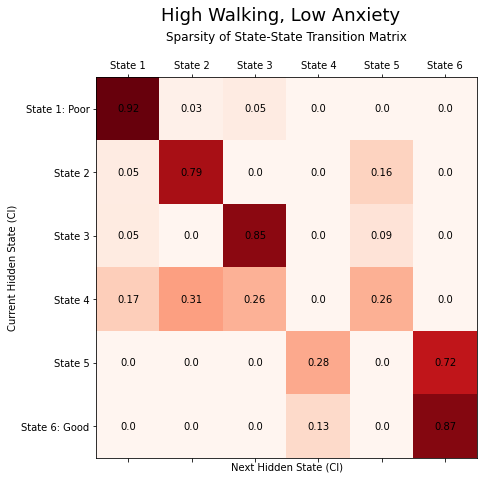

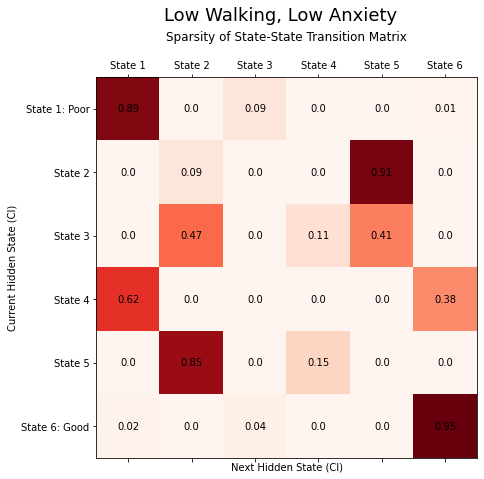

In [61]:
for group in group_no_to_hmm:
#     hmm = group_no_to_hmm[group]
    A = group_no_to_hmm[group]['new_A']
    O = group_no_to_hmm[group]['new_O']
    
    fig, ax = plt.subplots(figsize=(7,7))


    plot_matrix = A
    for i in range(plot_matrix.shape[0]):
        sum_over_row = sum(A[i,:])
        plot_matrix[i, :] = A[i,:]/sum_over_row

    ax.matshow(plot_matrix, cmap=plt.cm.Reds)

    for i in range(plot_matrix.shape[0]):
        for j in range(plot_matrix.shape[1]):
            c = np.round(plot_matrix[j,i], 2)
            ax.text(i, j, str(c), va='center', ha='center')
            
            
#     plt.colorbar()
    title_string = group_no_to_title[group]
    plt.suptitle(title_string, y=1.02, fontsize=18)
    plt.title('Sparsity of State-State Transition Matrix', y=1.08, )
    
    y = [0, 1, 2, 3, 4, 5]
    labels = ['State 1: Poor', 'State 2', 'State 3', 'State 4', 'State 5', 'State 6: Good']
    plt.yticks(y, labels, rotation='horizontal')
    
    x = [0, 1, 2, 3, 4, 5]
    labels = ['State 1', 'State 2', 'State 3', 'State 4', 'State 5', 'State 6']
    plt.xticks(x, labels, rotation='horizontal')
    
    
    plt.xlabel("Next Hidden State (CI)")
    plt.ylabel("Current Hidden State (CI)")
    plt.show()
    plt.close()
    
    

In [16]:
group_no = 1
group_hmm = group_no_to_hmm[group_no]['hmm']
state_id_to_state = group_no_to_team_data[group_no]['state_id_to_state']

team_id_map_to_state_id_sequence = group_no_to_team_data[group_no]['teams_state_id']

for team_id in team_id_map_to_state_id_sequence:
    for map_letter in team_id_map_to_state_id_sequence[team_id]:
        seq = team_id_map_to_state_id_sequence[team_id][map_letter]
        
        break
    break


In [17]:
seq = np.array(seq)
A = np.array(group_hmm.A)
O = np.array(group_hmm.O)

In [18]:
average_loss = []
# recommendations = []
for t in range(1, len(seq)):
    partial_seq = seq[:t]
    viterbi_output, all_sequences_and_probs = group_hmm.viterbi_all_probs(partial_seq)
    current_hidden = int(viterbi_output[-1])
    
    curr_obs_state = state_id_to_state[seq[t-1]]
    
    normalized_hidden_probs = A[current_hidden, :]/sum(A[current_hidden, :])
    next_hidden_predicted, next_hidden_prob = np.argmax(normalized_hidden_probs), max(normalized_hidden_probs)
    
    valid_obs = []
    for j in range(O.shape[1]):
        obs = state_id_to_state[j]
        if obs[3:] == curr_obs_state[0:3]:
            valid_obs.append(O[current_hidden, j])
        else:
            valid_obs.append(0)
        
    valid_obs /= sum(valid_obs)
#     next_obs_predicted_idx, next_obs_prob = np.argmax(O[current_hidden, :]), max(O[current_hidden, :])
#     print("valid_obs", valid_obs)
    next_obs_predicted_idx, next_obs_prob = np.argmax(valid_obs), max(valid_obs)
    next_obs_predicted_state = state_id_to_state[next_obs_predicted_idx]
    
    true_next_obs_state = state_id_to_state[seq[t]]
    
    loss = np.array(next_obs_predicted_state[0:3]) - np.array(true_next_obs_state[0:3])
    loss = sum([abs(elem) for elem in loss])
    average_loss.append(loss)
    
#     print("curr_obs_state", curr_obs_state)
#     print(next_hidden_predicted, next_hidden_prob)
#     print("next_obs_predicted_state", (next_obs_predicted_state, next_obs_prob))
#     print("CONFIDENCE", next_obs_prob)
#     print("ADJUSTED CONFIDENCE", next_obs_prob*next_hidden_prob)
#     print("true_next_obs_state", true_next_obs_state)
#     print("loss", loss)
#     print()
#     break
    
average_loss = np.mean(average_loss)
print("average_loss", average_loss)


average_loss 1.0


<ipython-input-18-7219cf27bc0f>:21: RuntimeWarning: invalid value encountered in true_divide
  valid_obs /= sum(valid_obs)


# Compute Aggregate Loss

In [19]:
group_to_loss = {}
for group_no in [1,2,3,4]:
    group_hmm = group_no_to_hmm[group_no]['hmm']
    A = np.array(group_hmm.A)
    O = np.array(group_hmm.O)

    state_id_to_state = group_no_to_team_data[group_no]['state_id_to_state']

    team_id_map_to_state_id_sequence = group_no_to_team_data[group_no]['teams_state_id']


    average_loss = []

    for team_id in team_id_map_to_state_id_sequence:
        for map_letter in team_id_map_to_state_id_sequence[team_id]:
            seq = team_id_map_to_state_id_sequence[team_id][map_letter]

            seq = np.array(seq)


            # recommendations = []
            for t in range(1, len(seq)):
                partial_seq = seq[:t]
                viterbi_output, all_sequences_and_probs = group_hmm.viterbi_all_probs(partial_seq)
                current_hidden = int(viterbi_output[-1])

                curr_obs_state = state_id_to_state[seq[t-1]]

                normalized_hidden_probs = A[current_hidden, :]/sum(A[current_hidden, :])
                next_hidden_predicted, next_hidden_prob = np.argmax(normalized_hidden_probs), max(normalized_hidden_probs)

                valid_obs = []
                for j in range(O.shape[1]):
                    obs = state_id_to_state[j]
                    if obs[3:] == curr_obs_state[0:3]:
                        valid_obs.append(O[current_hidden, j])
                    else:
                        valid_obs.append(0)

                if sum(valid_obs)>0:
                    valid_obs /= sum(valid_obs)
            #     next_obs_predicted_idx, next_obs_prob = np.argmax(O[current_hidden, :]), max(O[current_hidden, :])
            #     print("valid_obs", valid_obs)
                next_obs_predicted_idx, next_obs_prob = np.argmax(valid_obs), max(valid_obs)
                next_obs_predicted_state = state_id_to_state[next_obs_predicted_idx]

                true_next_obs_state = state_id_to_state[seq[t]]

                loss = np.array(next_obs_predicted_state[0:3]) - np.array(true_next_obs_state[0:3])
                loss = sum([abs(elem) for elem in loss])
                average_loss.append(loss)

            #     print("curr_obs_state", curr_obs_state)
            #     print(next_hidden_predicted, next_hidden_prob)
            #     print("next_obs_predicted_state", (next_obs_predicted_state, next_obs_prob))
            #     print("CONFIDENCE", next_obs_prob)
            #     print("ADJUSTED CONFIDENCE", next_obs_prob*next_hidden_prob)
            #     print("true_next_obs_state", true_next_obs_state)
            #     print("loss", loss)
            #     print()
            #     break

#     average_loss = np.mean(average_loss)
#     print("GROUP", group_no)
#     print("average_loss", average_loss)
    
    group_to_loss[group_no] = average_loss
    
    

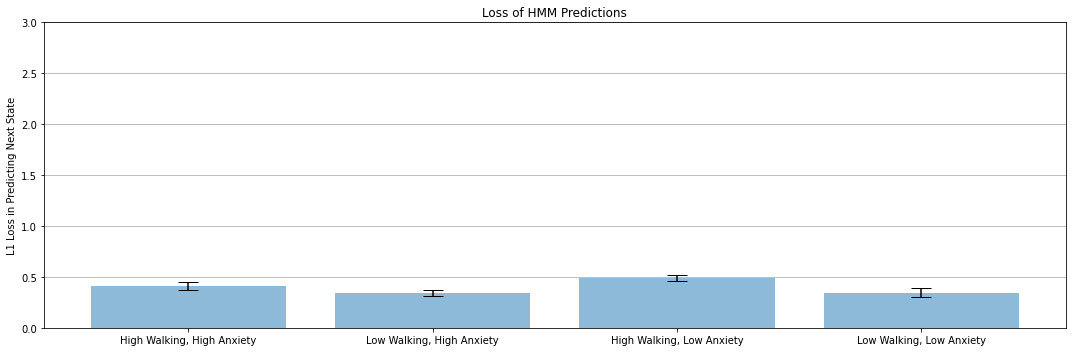

In [23]:
from scipy import stats
# Create lists for the plot
groups = [group_no_to_title[group] for group in group_to_loss]
x_pos = np.arange(len(groups))
means = [np.mean(group_to_loss[group]) for group in group_to_loss]
std_devs = [stats.sem(group_to_loss[group]) for group in group_to_loss]


# Build the plot
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x_pos, means, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('L1 Loss in Predicting Next State')
ax.set_xticks(x_pos)
ax.set_xticklabels(groups)
ax.set_title('Loss of HMM Predictions')
ax.yaxis.grid(True)

plt.ylim(0,3)
# Save the figure and show
plt.tight_layout()
plt.savefig('losses_with_error_bars.png')
plt.show()

Text(0.5, 0, 'Group')

<Figure size 1080x360 with 0 Axes>

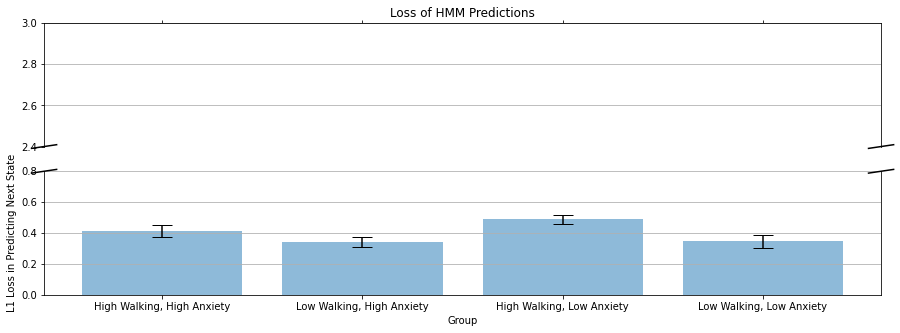

In [59]:
fig = plt.figure(figsize=(15,5))
# big_ax = fig.add_subplot(111)    # The big subplot
# ax = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)
# fig = plt.figure(figsize=(15,5))
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,5))

# plot the same data on both axes
ax.bar(x_pos, means, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('L1 Loss in Predicting Next State')
# ax.set_xticks(x_pos)
# ax.set_xticklabels(groups)
# ax.set_title('Loss of HMM Predictions')
ax.yaxis.grid(True)

ax2.bar(x_pos, means, yerr=std_devs, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax2.set_ylabel('L1 Loss in Predicting Next State')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(groups)
# ax2.set_title('Loss of HMM Predictions')
ax2.yaxis.grid(True)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(2.4, 3)  # outliers only
ax2.set_ylim(0, .8)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax.set_title('Loss of HMM Predictions')


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.ylabel('L1 Loss in Predicting Next State')
plt.xlabel('Group')


# Make recommendations

In [21]:
group_to_loss = {}
for group_no in [1,2,3,4]:
    print("GROUP", group_no)
    group_hmm = group_no_to_hmm[group_no]['hmm']
    
#     true_hidden_seqs = group_no_to_hmm[group_no]['hidden_seqs']
    
    A = np.array(group_hmm.A)
    O = np.array(group_hmm.O)

    state_id_to_state = group_no_to_team_data[group_no]['state_id_to_state']

    team_id_map_to_state_id_sequence = group_no_to_team_data[group_no]['teams_state_id']


    average_loss = []

    for team_id in team_id_map_to_state_id_sequence:
        print("TEAM ID: ", team_id)
        for map_letter in team_id_map_to_state_id_sequence[team_id]:
            print("MAP: ", map_letter)
            seq = team_id_map_to_state_id_sequence[team_id][map_letter]

            seq = np.array(seq)
            


            recommendations = []
            
            true_hidden = []
            predicted_hidden = []
            
            for t in range(1, len(seq)):
                partial_seq = seq[:t]
#                 true_next_hidden = true_hidden_seqs[(team_id, map_letter)][t]
                
                viterbi_output, all_sequences_and_probs = group_hmm.viterbi_all_probs(partial_seq)
                current_hidden = int(viterbi_output[-1])

                curr_obs_state = state_id_to_state[seq[t-1]]

                normalized_hidden_probs = A[current_hidden, :]/sum(A[current_hidden, :])
                next_hidden_predicted, next_hidden_prob = np.argmax(normalized_hidden_probs), max(normalized_hidden_probs)

                valid_obs = []
                for j in range(O.shape[1]):
                    obs = state_id_to_state[j]
                    if obs[3:] == curr_obs_state[0:3]:
                        valid_obs.append(O[current_hidden, j])
                    else:
                        valid_obs.append(0)

                if sum(valid_obs)>0:
                    valid_obs /= sum(valid_obs)

                    
                next_obs_predicted_idx, next_obs_prob = np.argmax(valid_obs), max(valid_obs)
                next_obs_predicted_state = state_id_to_state[next_obs_predicted_idx]

                true_next_obs_state = state_id_to_state[seq[t]]

                loss = np.array(next_obs_predicted_state[0:3]) - np.array(true_next_obs_state[0:3])
                loss = sum([abs(elem) for elem in loss])
                average_loss.append(loss)
                
                improve_on = []
                if next_obs_predicted_state[0] == 0:
                    improve_on.append("skill use")
                if next_obs_predicted_state[1] == 0:
                    improve_on.append("workload burndown")
                if next_obs_predicted_state[2] == 0:
                    improve_on.append("effort")
                
                if len(improve_on)==0:
                    rec = "No intervention."
                else:
                    rec = f"With confidence {next_hidden_prob*next_obs_prob}, recommend intervention on {improve_on}."
                recommendations.append((rec, next_obs_predicted_state))
                
#                 true_hidden.append(true_next_hidden)
#                 predicted_hidden.append(next_hidden_predicted)

#     average_loss = np.mean(average_loss)
    
#     print("average_loss", average_loss)
            for elem in recommendations:
                print(elem)
            print()
        
    print("\n\n\n")
    group_to_loss[group_no] = average_loss
    
    

GROUP 1
TEAM ID:  TM000104
MAP:  A
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6765437920626285, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 0, 0, 0))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.3340212510821785, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.

("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.3340212510821785, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use

("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5631485447575316, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.8989032863664812, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effor

("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1

("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
('No intervention.', (1, 1, 1, 0, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'worklo

("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7224

("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'ef

('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.47272727272923293, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.9454545454545354, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
('No intervention.', (1, 1, 1, 1, 0, 1))
(

# Plot Hidden State predictions

GROUP 1
TEAM ID:  TM000104
MAP:  A


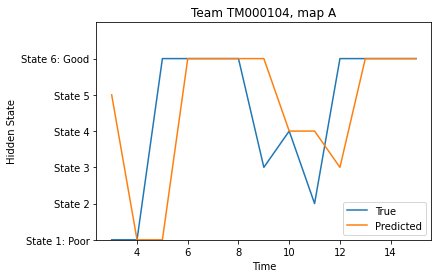

("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6765437920626285, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 0, 0, 0))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.3340212510821785, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confi

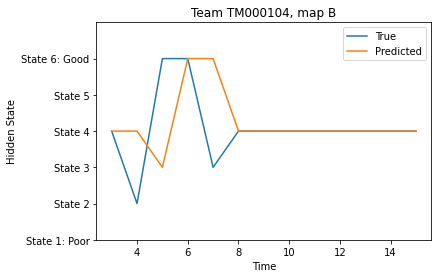

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.3340212510821785, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

TEAM ID:  TM000146
MAP:  A


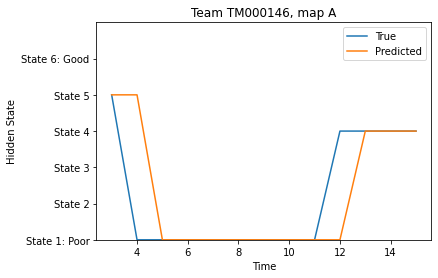

("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.9032816474473393, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend in

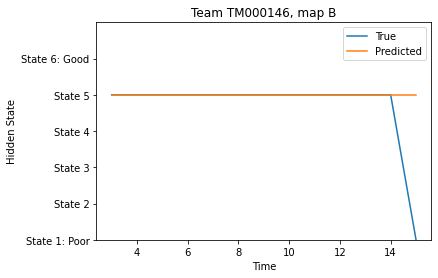

("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use'

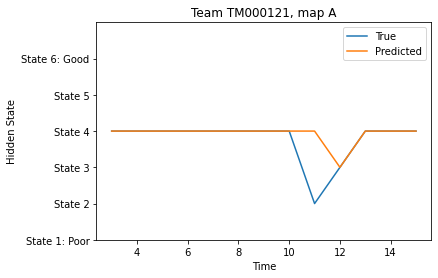

("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervent

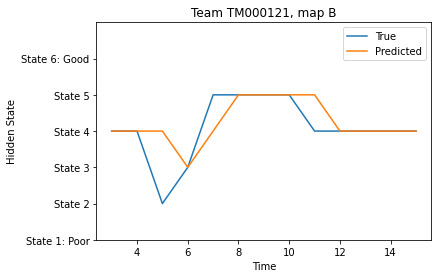

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.9032816474473393, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.767

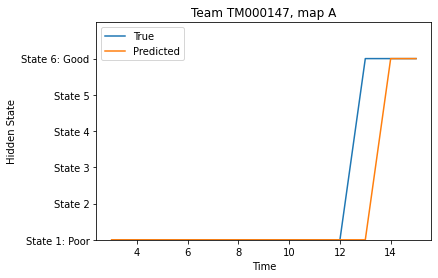

("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8864764439631155, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 1))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].",

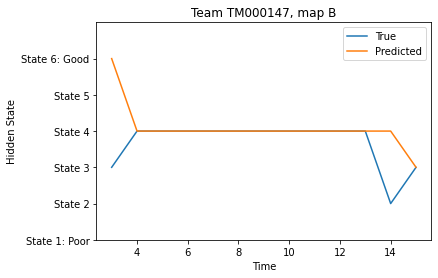

("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.3340212510821785, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))

TEAM ID:  TM000128
MAP:  A


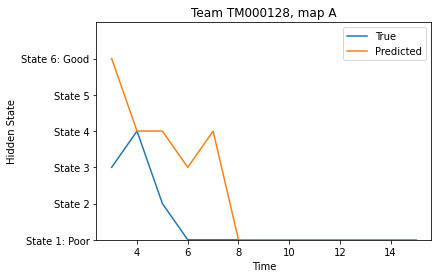

("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.31470244437035555, recommend intervention on ['skill use'].", (0, 1, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With co

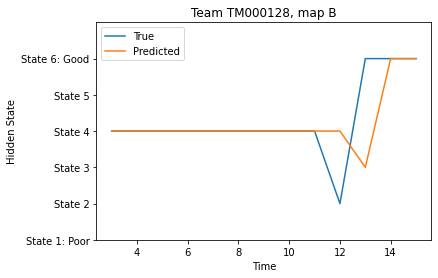

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 0))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))

TEAM ID:  TM000123
MAP:  A


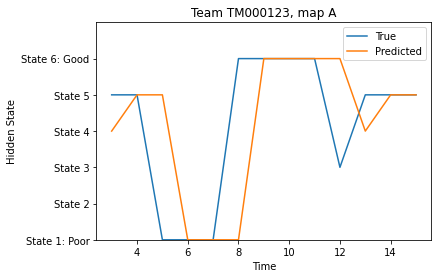

("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.9032816474473393, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6561212174075001, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6561212174075001, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6561212174075001, recommend intervention on ['skill use', 'effort'].

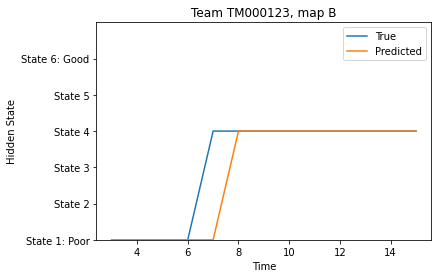

("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8864764439631155, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 0))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

TEAM ID:  TM000150
MAP:  A


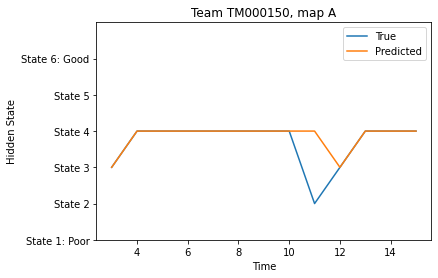

('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndow

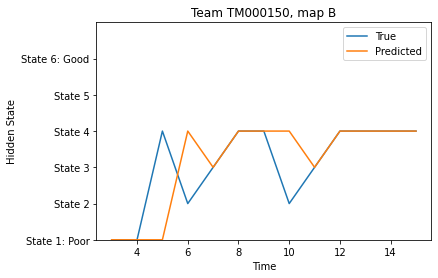

("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8864764439631155, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.329295689498532, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['ski

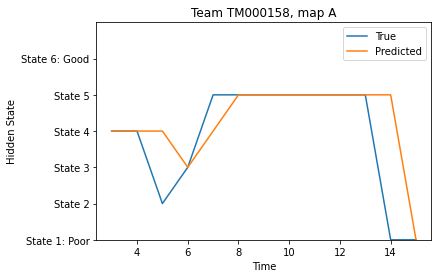

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.329295689498532, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].

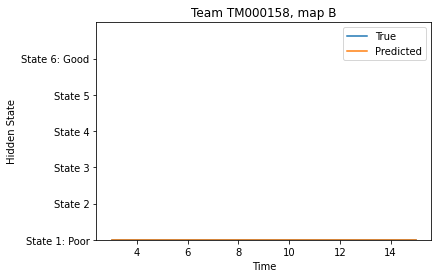

("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With

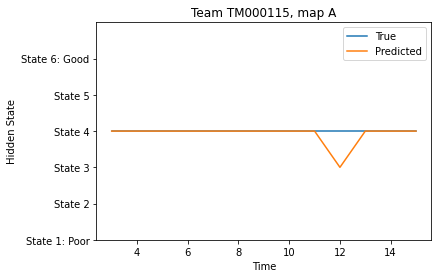

("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.31470244437035555, recommend intervention on ['skill use'].", (0, 1, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))

MAP:  B


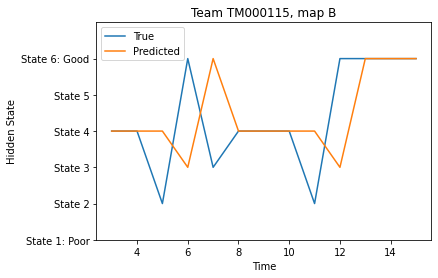

("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.3340212510821785, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use

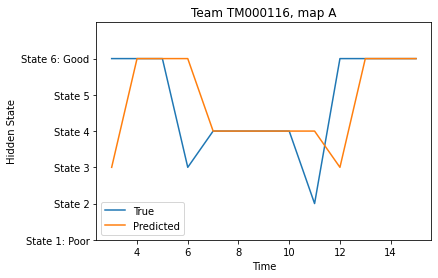

('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.3340212510821785, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))

MAP:  B


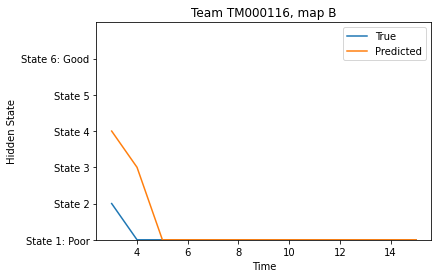

('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.329295689498532, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.638767086159767, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workloa

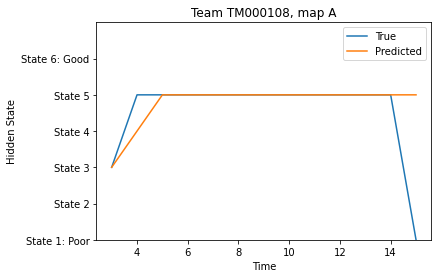

("With confidence 0.29049456403417434, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on [

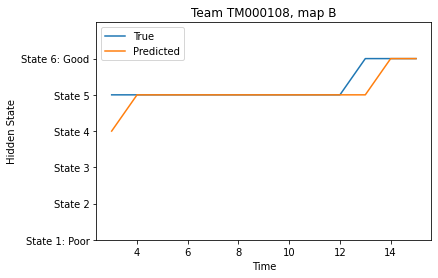

("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use'

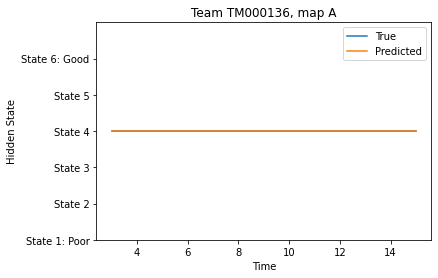

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

MAP:  B


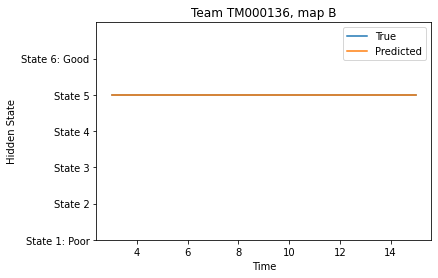

("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use'

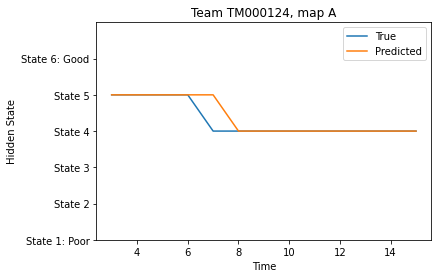

("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.9032816474473393, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown

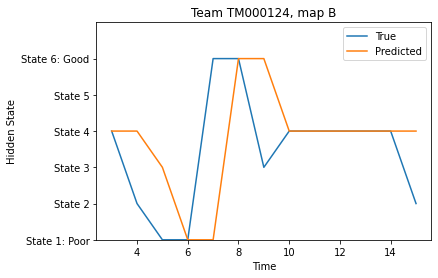

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.31470244437035555, recommend intervention on ['skill use'].", (0, 1, 1, 0, 0, 1))
("With confidence 0.8864764439631155, recommend intervention on ['effort'].", (1, 1, 0, 0, 1, 0))
("With confidence 0.7756668884675755, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.7381363695834376, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7673314339981007, reco

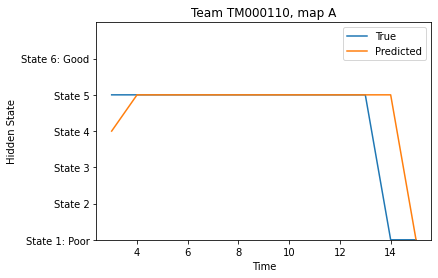

("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use'

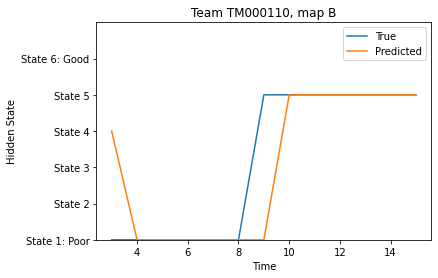

("With confidence 0.6667468724147079, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6754106239719282, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6765437920626285, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 0, 0, 0))
("With confidence 0.8380721648968125, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.83

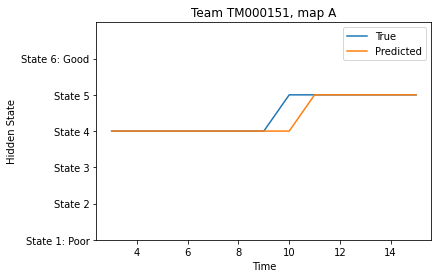

("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.47185145345647544, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1

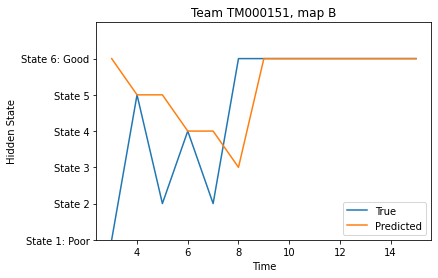

("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
('No intervention.', (1, 1, 1, 0, 0, 0))
("With confidence 0.8989032863664812, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndo

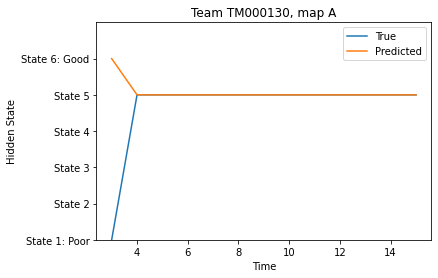

("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

MAP:  B


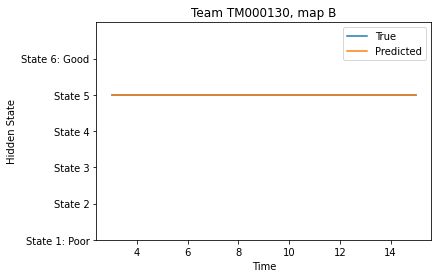

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

TEAM ID:  TM000109
MAP:  A


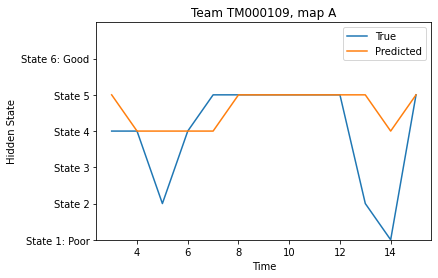

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 0))
("With confidence 0.47185145345647544, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.47185145345647544, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))

MAP:  B


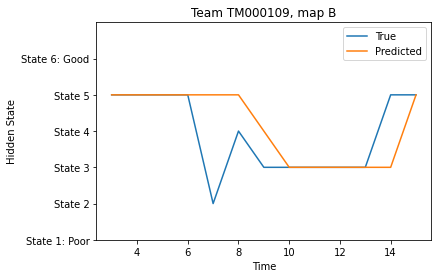

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

TEAM ID:  TM000103
MAP:  A


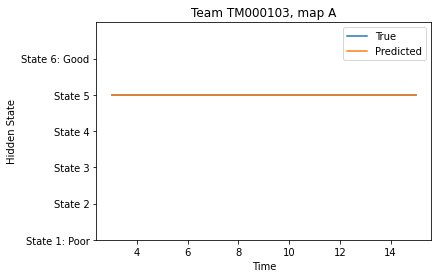

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

MAP:  B


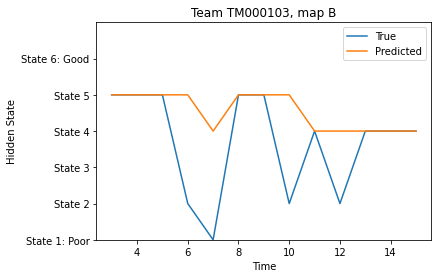

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5124632113333822, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.47185145345647544, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))

TEAM ID:  TM000132
MAP:  A


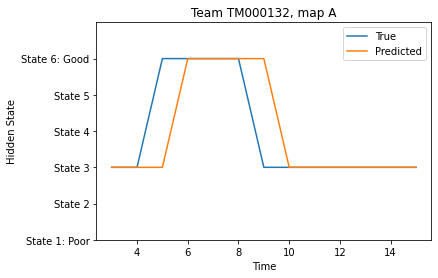

("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5631485447575316, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.8989032863664812, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effor

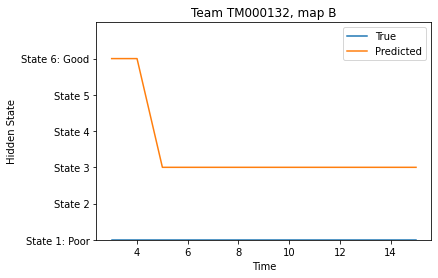

("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend inte

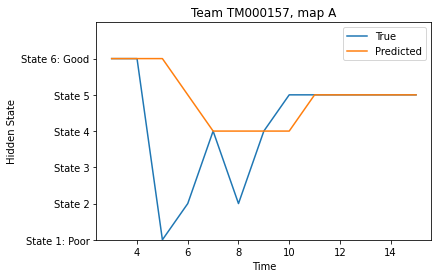

("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.47185145345647544, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.47185145345647544, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No

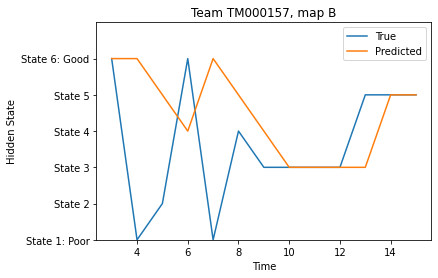

("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
('No intervention.', (1, 1, 1, 1, 0, 0))
("With confidence 0.5124632113333822, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0)

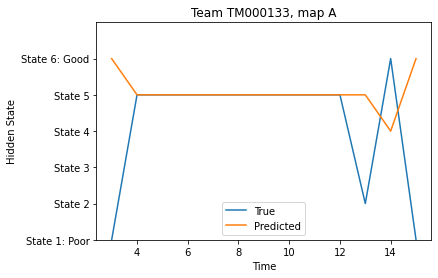

("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, 

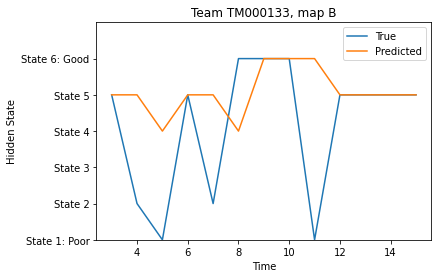

("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 

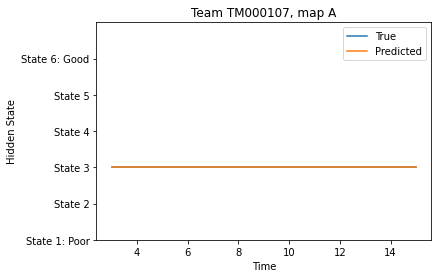

("With confidence 0.8989032863664812, recommend intervention on ['effort'].", (1, 1, 0, 1, 0, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8989032863664812, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8989032863664812, recommend intervention on ['effort'].", (1, 1, 0, 1, 0, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.

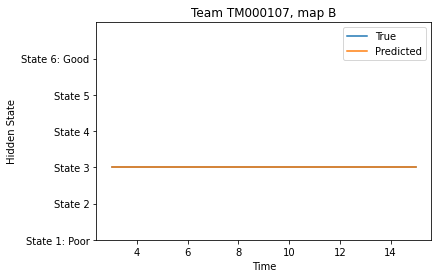

("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5631485447575316, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.5631485447575316, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.5631485447575316, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (

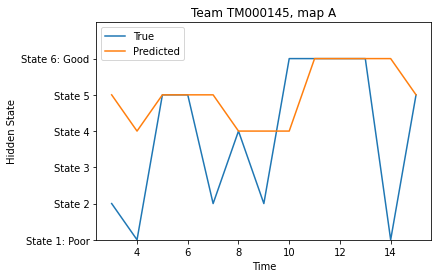

('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5124632113333822, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5124632113333822, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.47185145345647544, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.47185145345647544, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, rec

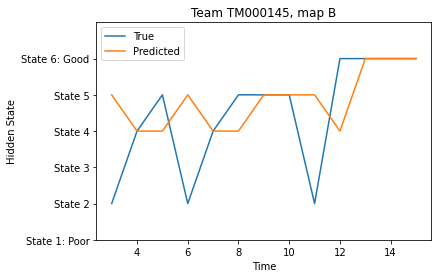

('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.47185145345647544, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.47185145345647544, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.512

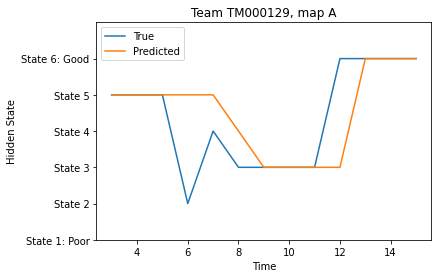

("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 0))
("With confidence 0.5631485447575316, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.5650249589730729, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8989032863664812, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With 

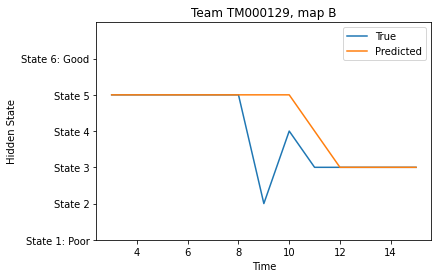

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 0))
("With confidence 0.5992688575776541, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 1))
("With confidence 0.5631485447575316, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.5631485447575316, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.5631485447575316, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))

TEAM ID:  TM000139
MAP:  A


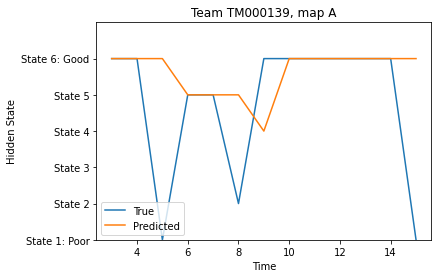

("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5124632113333822, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("Wit

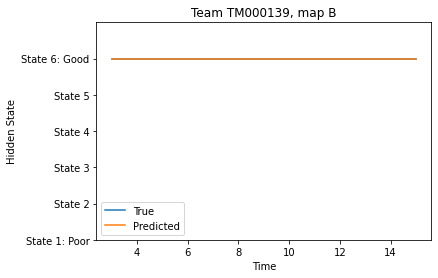

("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workl

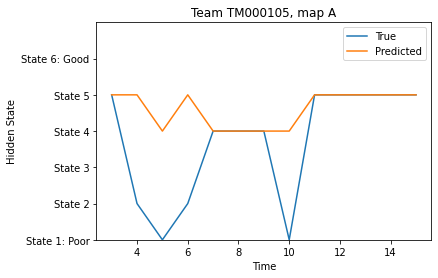

("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
('No intervention.', (1, 1, 1, 0, 0, 0))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708,

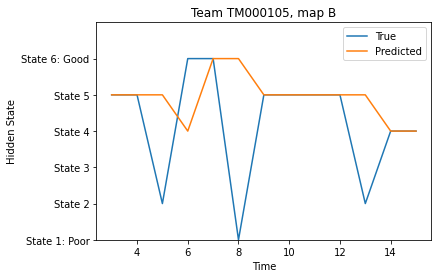

("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1

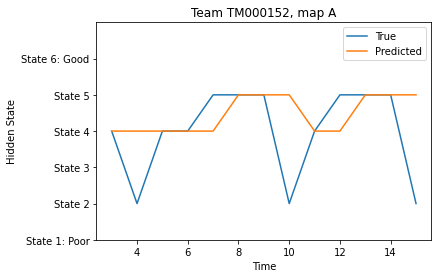

("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.47185145345647544, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.47185145345647544, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With

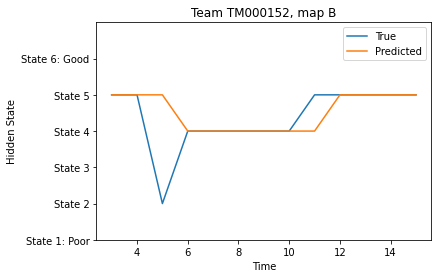

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5124632113333822, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.28640439243913607, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.47185145345647544, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
(

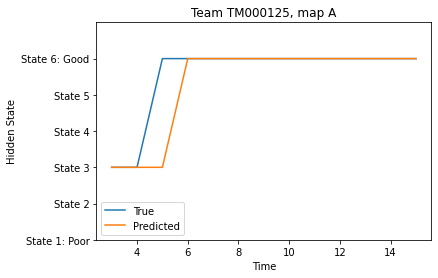

("With confidence 0.5992688575776541, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 1))
("With confidence 0.5631485447575316, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.8989032863664812, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.82691

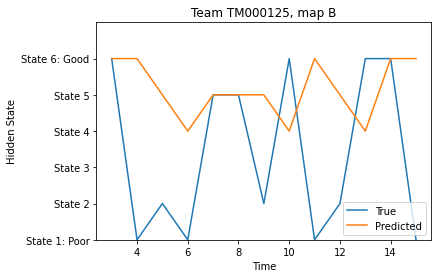

("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.699999682027792, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7791842156558708, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5124632113333822, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.83908045977011

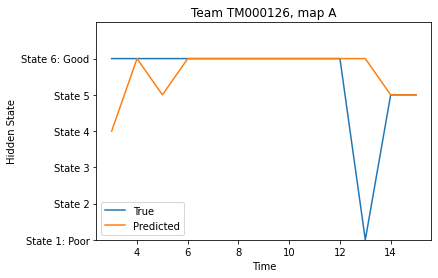

("With confidence 0.5124632113333822, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
('No intervention.', (1, 1, 1, 1, 0, 0))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.8390804597701149, reco

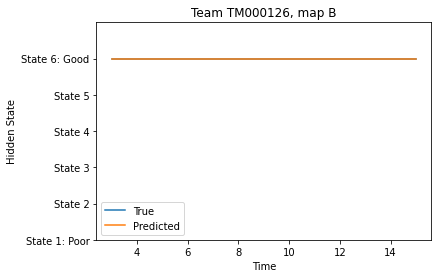

("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.826919873396635, recommend intervention on ['skill use', 'workl

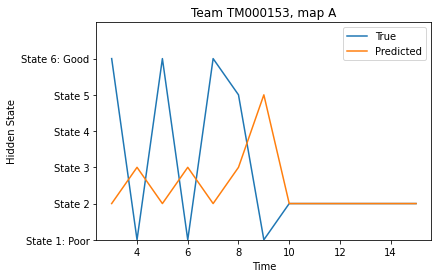

("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
('No intervention.', (1, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

MAP:  B


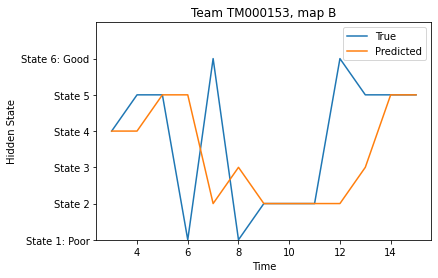

("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
('No intervention.', (1, 1, 1, 0, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 0, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill

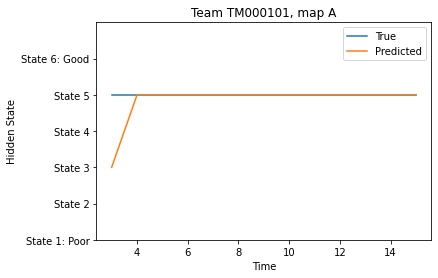

("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.4145278570440437, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.4145278570440437, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, reco

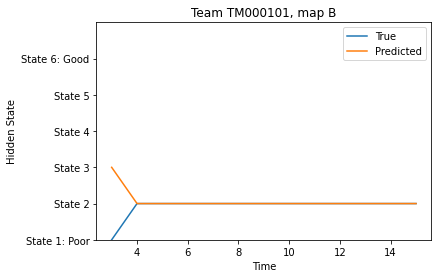

("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

TEAM ID:  TM000161
MAP:  A


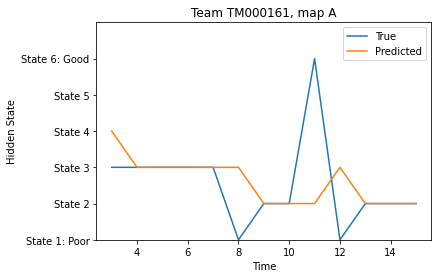

("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidenc

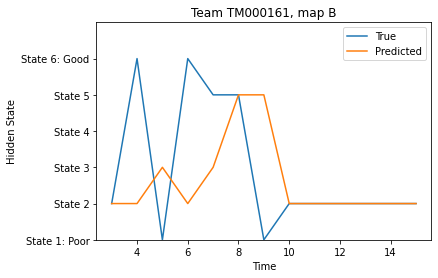

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

TEAM ID:  TM000111
MAP:  A


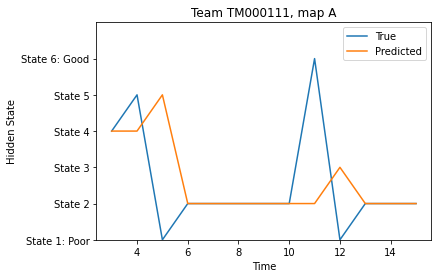

("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
('No intervention.', (1, 1, 1, 0, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

MAP:  B


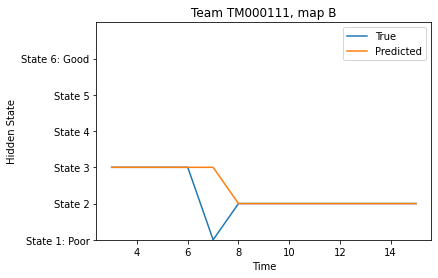

("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1,

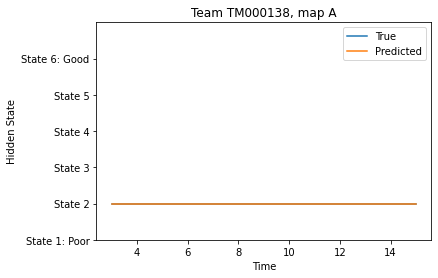

("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

MAP:  B


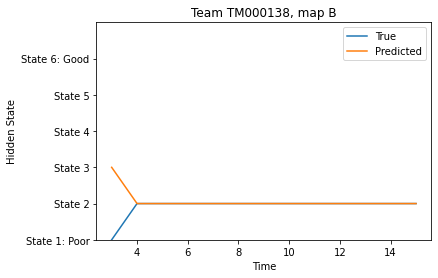

("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
('No

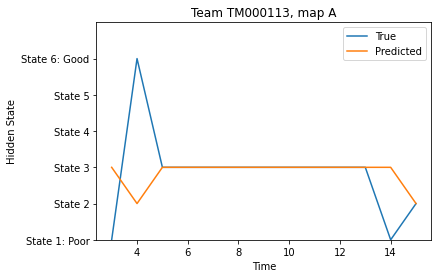

("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
('No intervention.', (1, 1, 1, 0, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'worklo

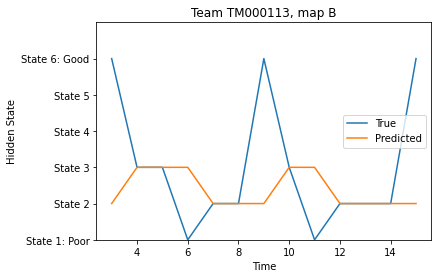

("With confidence 0.7224329747492123, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No inter

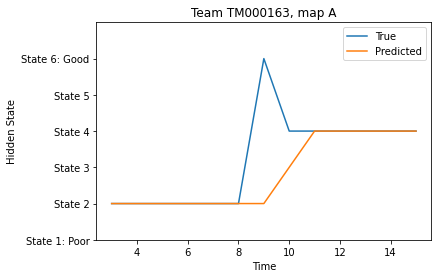

("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.3081679371211917, recommend intervention on ['effort'].", (1, 1, 0, 1, 0, 0))
("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.7

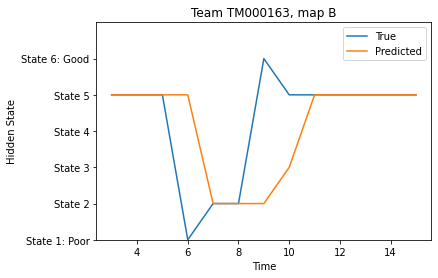

("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
('No intervention.', (1, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0)

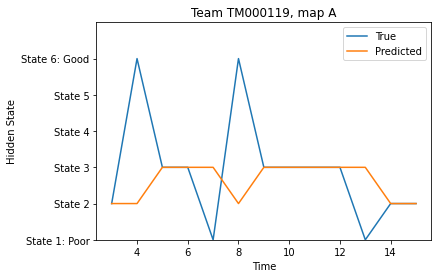

('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.30816793712081947, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7224329747492123, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.64

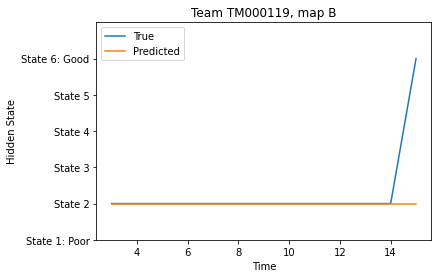

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

TEAM ID:  TM000167
MAP:  A


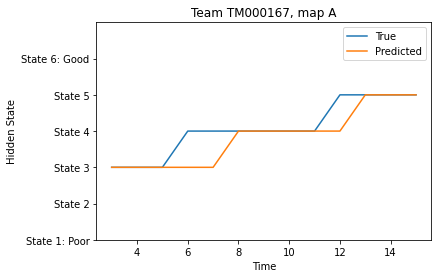

("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0

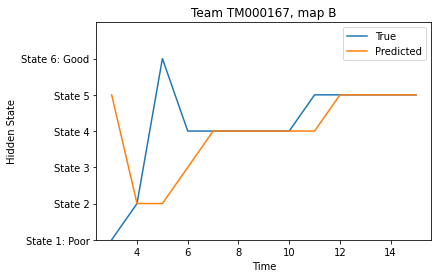

("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['effort'].", (1, 1, 0, 1, 0, 0))
("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort

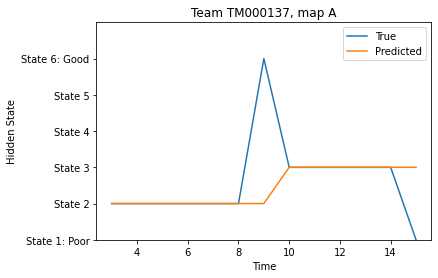

("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With conf

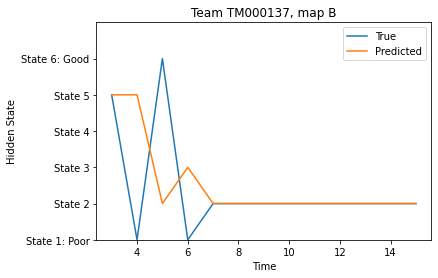

("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.4145278570440437, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.7224329747492123, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.7224329747492123, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['ski

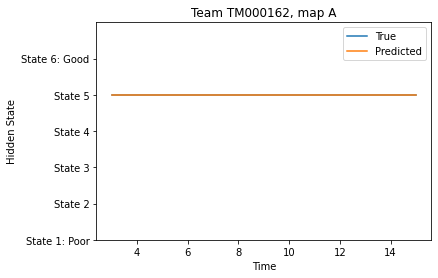

("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.

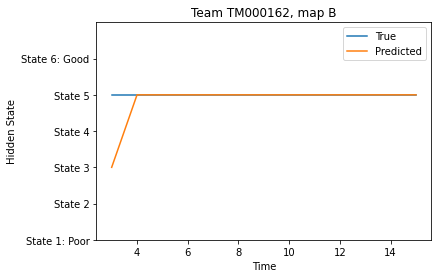

("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0

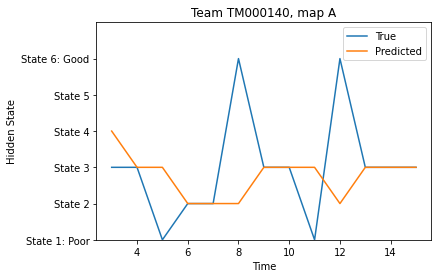

("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
('No intervention.', (1, 1, 1, 0, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 0, 1, 1))
("With confidence 0.30816

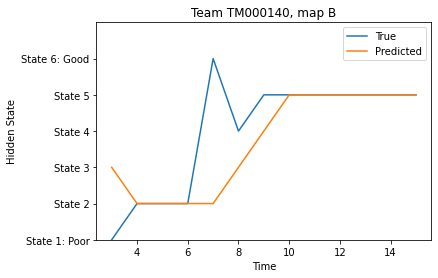

("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.30816793712081947, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.4145278570440437, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 

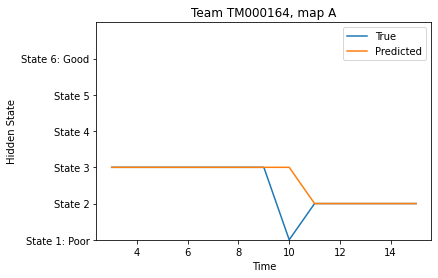

("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7224

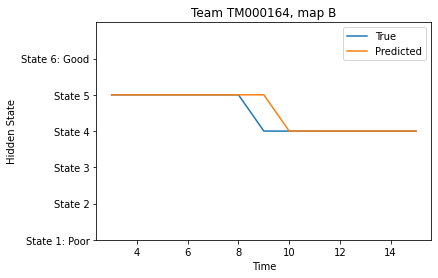

("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.4145278570440437, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort

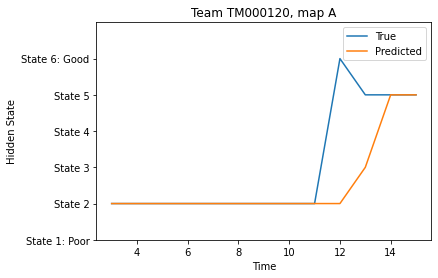

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))

MAP:  B


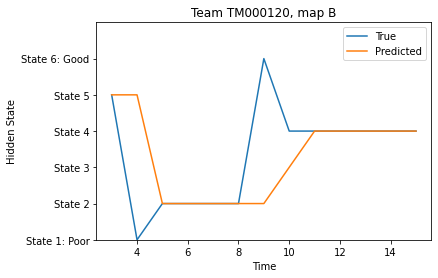

("With confidence 0.4145278570440437, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.30816793712081947, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skil

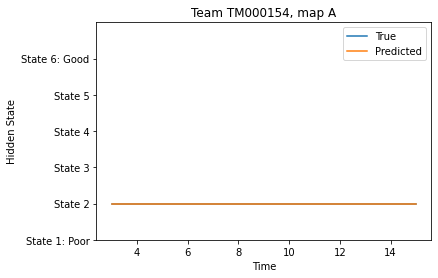

("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

MAP:  B


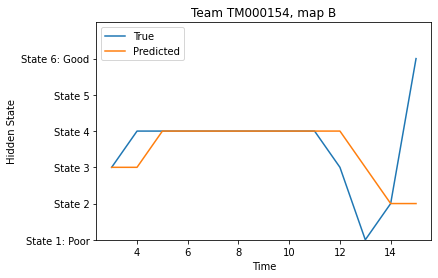

("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7918443177142094, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With co

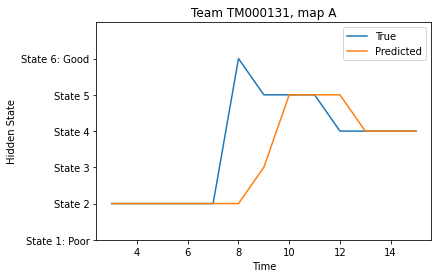

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.4145278570440437, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'work

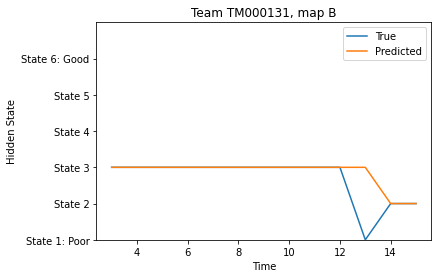

("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confide

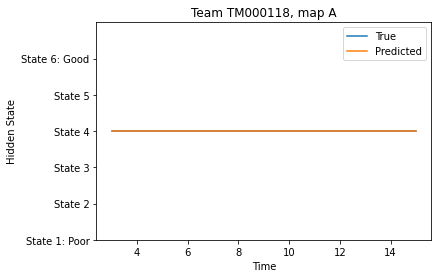

("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workl

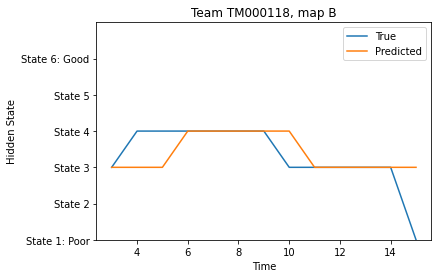

("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].",

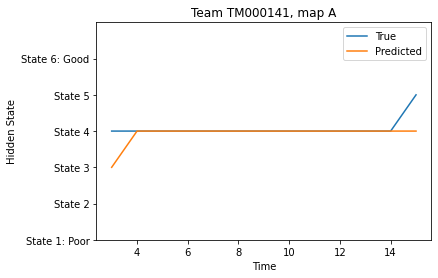

("With confidence 0.30816793712081947, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 

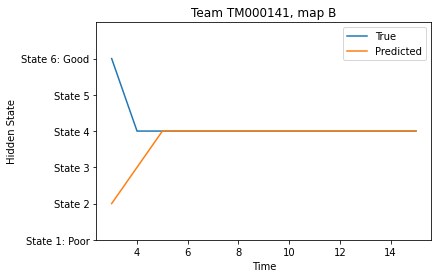

("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.30816793712081947, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635

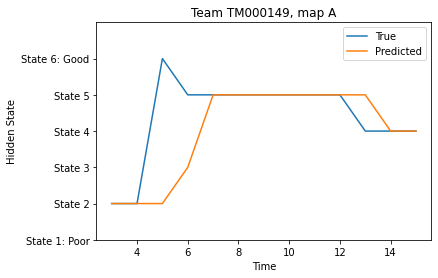

("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8521255320314955, recommend intervention on ['effort'].", (1, 1, 0, 1, 0, 0))

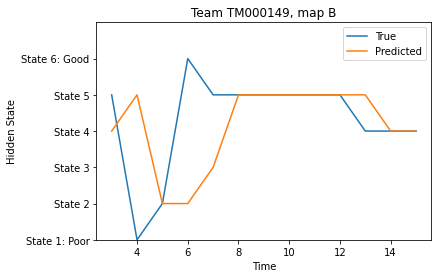

("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.6882552374100541, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.

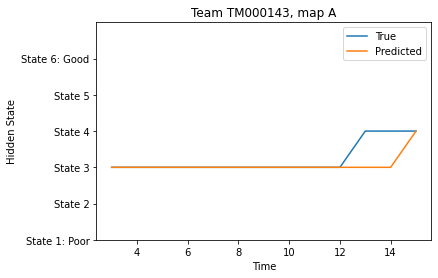

("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413

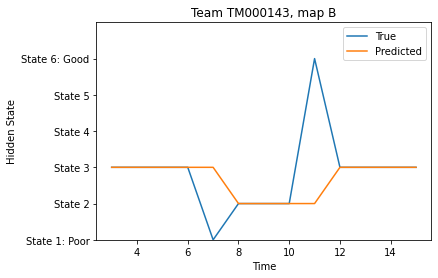

("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 0, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.6622464320695708, recommend intervention on ['workload burndown'].", (1, 0, 1, 1, 0, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.641380

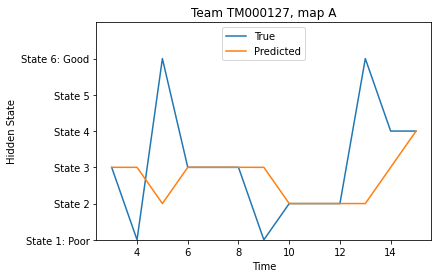

("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
('No intervention.', (1, 1, 1, 0, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7224329747492123, recommend intervention on ['skill use'].", (0, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use

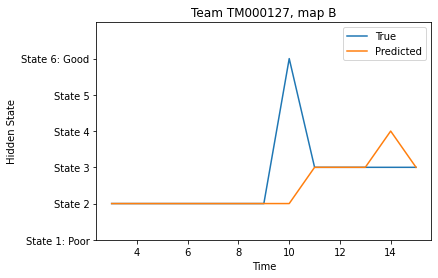

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.5536551240201016, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 1))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.6413801725422547, recommend intervention on ['skill use', 'workload burndown'].", (0,

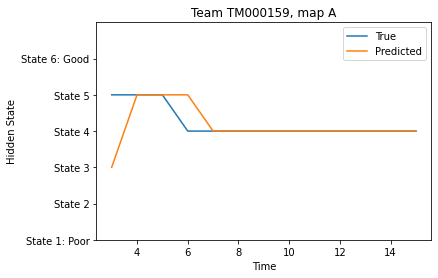

("With confidence 0.3081679371211917, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.6124652261476373, recommend intervention on ['skill use', 'effort'].", (0, 1, 0, 0, 1, 0))
("With confidence 0.4145278570440437, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.760955894032374, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.760955894032374, 

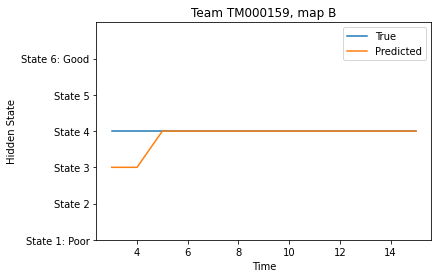

("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.5310793340971229, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.869588433635161, recommend intervention on ['skill use', 'workload burndown', 'ef

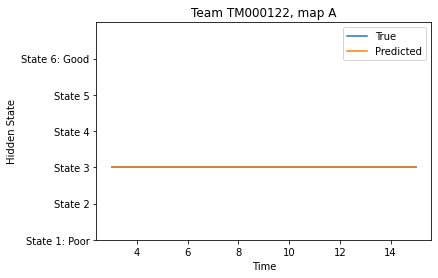

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

MAP:  B


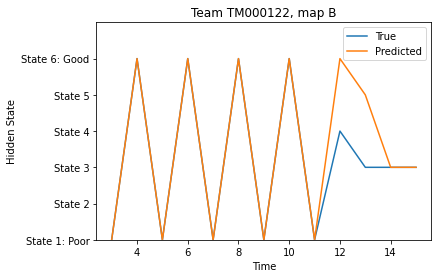

('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.4589360173099044, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 1, 0, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.4589360173099044, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 1, 0, 1))
("With confidence 0.625, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0

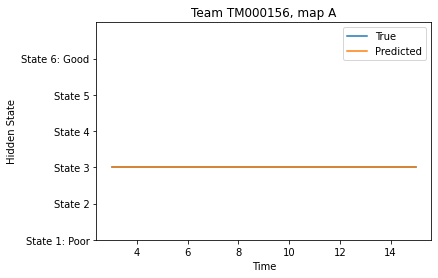

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

MAP:  B


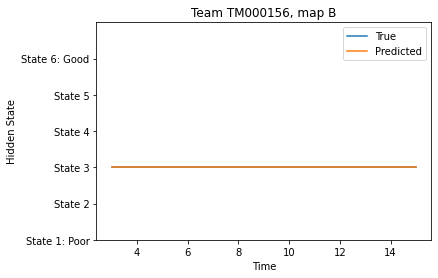

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

TEAM ID:  TM000114
MAP:  A


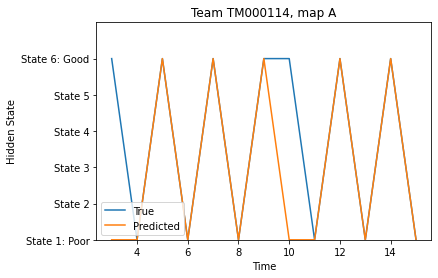

('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.5251676770139136, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.8477560106457238, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.9107681179399504, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 1, 1, 1))
("With confidence 0.8477560106457238, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.5251676770139136, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.8477560106457238, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.9107681179400197, recommend intervention on ['skill use'].", (0, 1, 1, 0, 0, 0))
("With confidence 0.8477560106457238, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With c

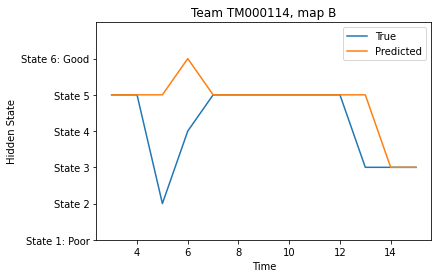

("With confidence 0.625, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.4746964843609591, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 1, 0, 1))
("With confidence 0.625, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", 

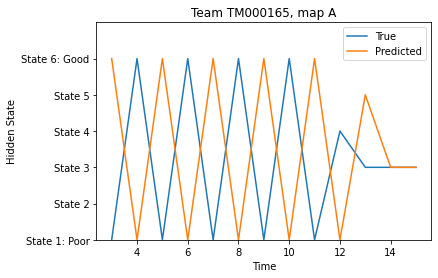

("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484

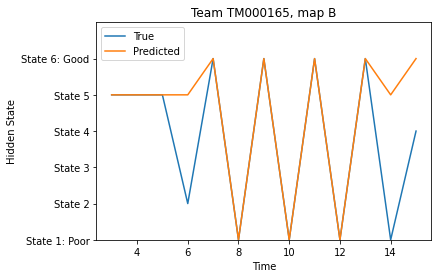

("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.4746964843609591, recommend intervention on ['workload burndown'].", (1, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.5251676770139136, recommend intervention on ['skill use'].", (0, 1, 1, 0, 1, 1))
("With confidence 

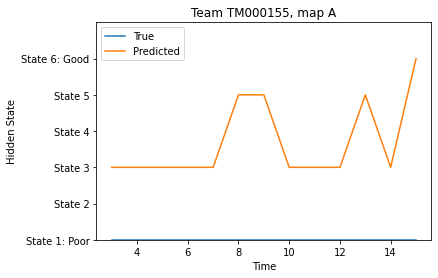

('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.47272727272923293, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.47272727272923293, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.47272727272923293, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))

MAP:  B


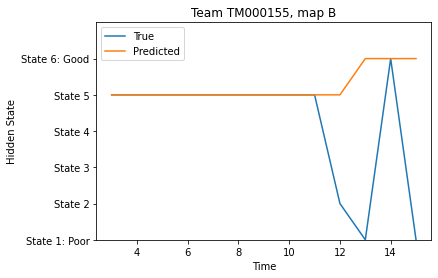

("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
('No intervention.',

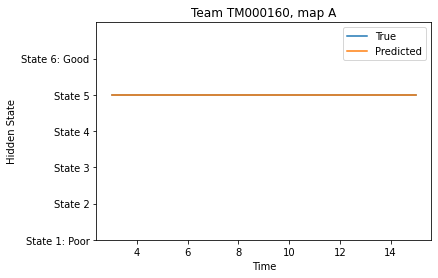

("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use'

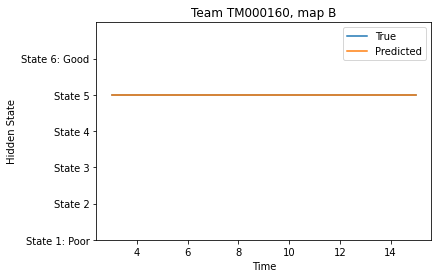

("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use'

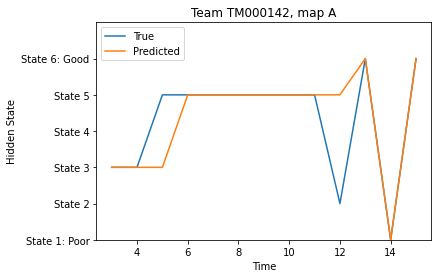

('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.47272727272923293, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 0))
("With confidence 0.9454545454545354, recommend intervention on ['effort'].", (1, 1, 0, 0, 0, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
('No intervention.', (1, 1, 1, 1, 0, 1))
(

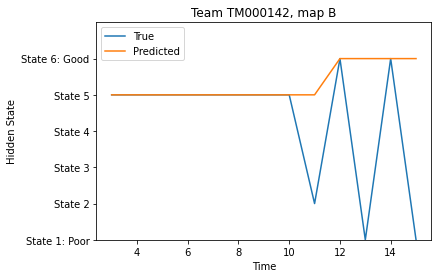

("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
("With confidence 0.8947368421049271, recommend intervention on ['effort'].", (1, 1, 0, 1, 1, 0))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.8477560106457238, recommend intervention on ['workload bu

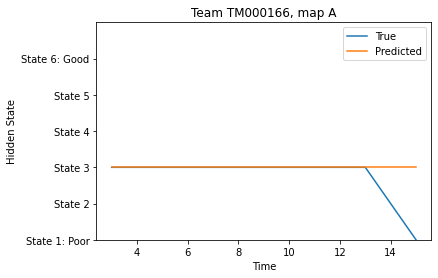

('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))

MAP:  B


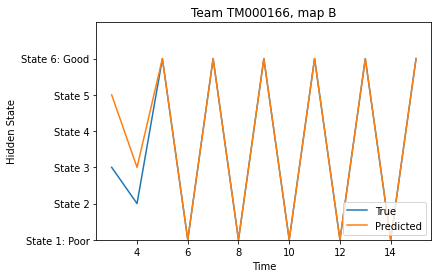

("With confidence 0.625, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 1))
('No intervention.', (1, 1, 1, 1, 1, 1))
("With confidence 0.4746964843609591, recommend intervention on ['workload burndown'].", (1, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))

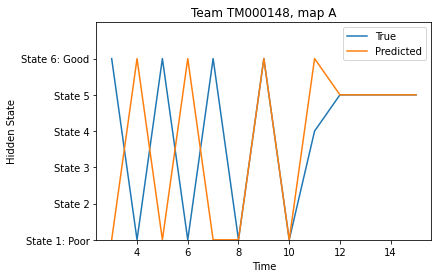

("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6596646838753863, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.8477560106457238, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.6596646838753863, recommend intervention on ['workload burndown', 'effort'].", (1, 0, 0, 1, 0, 0))
("With confidence 0.8477560106457

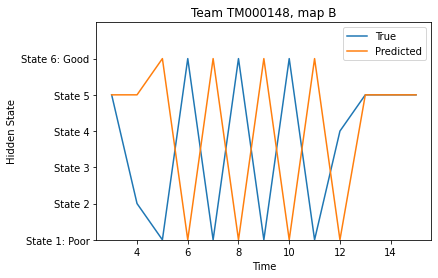

("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.4746964843609591, recommend intervention on ['workload burndown'].", (1, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence

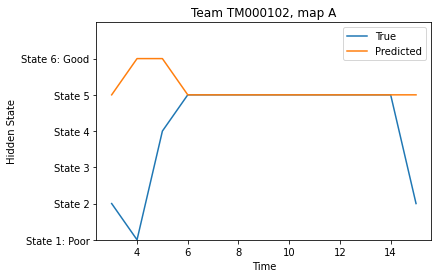

("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.4746964843609591, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 1, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.625, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 0, 0, 0))
("With confidence 0.8272095332671432, recommend intervention on ['skill use', 'workload burndown', 'effort'].

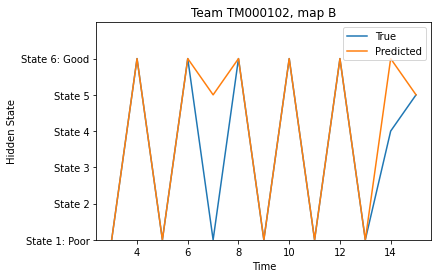

("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
('No intervention.', (1, 1, 1, 1, 0, 1))
("With confidence 0.4589360173099044, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 1, 0, 1))
("With confidence 0.625, recommend intervention on ['skill use', 'workload burndown', 'effort'].", (0, 0, 0, 1, 1, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.7484712892063221, recommend intervention on ['skill use', 'workload burndown'].", (0, 0, 1, 0, 0, 1))
("With confidence 0.6890088453669042, recommend intervention on ['skill use', 'workload burndown'].", (0, 0,

In [60]:
group_to_loss = {}
for group_no in [1,2,3,4]:
    print("GROUP", group_no)
    group_hmm = group_no_to_hmm[group_no]['hmm']
    
    true_hidden_seqs = group_no_to_hmm[group_no]['hidden_seqs']
    
    A = np.array(group_hmm.A)
    O = np.array(group_hmm.O)

    state_id_to_state = group_no_to_team_data[group_no]['state_id_to_state']

    team_id_map_to_state_id_sequence = group_no_to_team_data[group_no]['teams_state_id']


    average_loss = []

    for team_id in team_id_map_to_state_id_sequence:
        print("TEAM ID: ", team_id)
        for map_letter in team_id_map_to_state_id_sequence[team_id]:
            print("MAP: ", map_letter)
            seq = team_id_map_to_state_id_sequence[team_id][map_letter]

            seq = np.array(seq)
            


            recommendations = []
            
            true_hidden = []
            predicted_hidden = []
            
            for t in range(1, len(seq)):
                partial_seq = seq[:t]
                true_next_hidden = true_hidden_seqs[(team_id, map_letter)][t]
                
                viterbi_output, all_sequences_and_probs = group_hmm.viterbi_all_probs(partial_seq)
                current_hidden = int(viterbi_output[-1])

                curr_obs_state = state_id_to_state[seq[t-1]]

                normalized_hidden_probs = A[current_hidden, :]/sum(A[current_hidden, :])
                next_hidden_predicted, next_hidden_prob = np.argmax(normalized_hidden_probs), max(normalized_hidden_probs)

                valid_obs = []
                for j in range(O.shape[1]):
                    obs = state_id_to_state[j]
                    if obs[3:] == curr_obs_state[0:3]:
                        valid_obs.append(O[current_hidden, j])
                    else:
                        valid_obs.append(0)

                if sum(valid_obs)>0:
                    valid_obs /= sum(valid_obs)

                    
                next_obs_predicted_idx, next_obs_prob = np.argmax(valid_obs), max(valid_obs)
                next_obs_predicted_state = state_id_to_state[next_obs_predicted_idx]

                true_next_obs_state = state_id_to_state[seq[t]]

                loss = np.array(next_obs_predicted_state[0:3]) - np.array(true_next_obs_state[0:3])
                loss = sum([abs(elem) for elem in loss])
                average_loss.append(loss)
                
                improve_on = []
                if next_obs_predicted_state[0] == 0:
                    improve_on.append("skill use")
                if next_obs_predicted_state[1] == 0:
                    improve_on.append("workload burndown")
                if next_obs_predicted_state[2] == 0:
                    improve_on.append("effort")
                
                if len(improve_on)==0:
                    rec = "No intervention."
                else:
                    rec = f"With confidence {next_hidden_prob*next_obs_prob}, recommend intervention on {improve_on}."
                recommendations.append((rec, next_obs_predicted_state))
                
                true_hidden.append(true_next_hidden)
                predicted_hidden.append(next_hidden_predicted)

#     average_loss = np.mean(average_loss)
    
#     print("average_loss", average_loss)
#             for elem in recommendations:
#                 print(elem)
#             print()
            plt.plot(range(3, len(true_hidden)+3), true_hidden)
            plt.plot(range(3, len(predicted_hidden)+3), predicted_hidden)
            plt.legend(['True', 'Predicted'])
            
            plt.ylim(0,6)
            y = [0, 1, 2, 3, 4, 5]
            labels = ['State 1: Poor', 'State 2', 'State 3', 'State 4', 'State 5', 'State 6: Good']
            plt.yticks(y, labels, rotation='horizontal')
            
    
            plt.title(f"Team {team_id}, map {map_letter}")
            plt.xlabel("Time")
            plt.ylabel("Hidden State")
            plt.show()
            plt.close()
            
            for elem in recommendations:
                print(elem)
            print()
        
    print("\n\n\n")
    group_to_loss[group_no] = average_loss
    
    